# <font size="+1">**Table de matières**</font>

<font size="+3"><span style='color:#26467a'> **P4 - Anticipez les besoins en consommation de bâtiments** </span></font>


![SeattleLogo](img/Seattle_logo.png)


Ce Notebook s'intègre dans le projet d'analyse de la consommation et des émissions des bâtiments non destinés à l’habitation dans la ville de Seattle.

Il comprend la modélisation de la **consomation totale d'énergie des bâtiments non destinés à l'habitation**.

Le jeu de données uilisé correspond à la sauvegarde du jeu de données nettoyé et transformé lors de la première phase de nettoyage.<br> (*SanchezPellicer_Raquel_1_notebook_exploratoire_012023.ipynb*)



[Librairies utilisées](#CHARGEMENT_LIBRAIRIES)<br>

[Fontcions utilisées dans ce notebook](#FONCTIONS_UTILISÉES)<br>

---

[**Description du jeux de données**](#fichier_données)


[**Pre-processing**](#pre_processing)
 * [Stratification des données](#data_stratification)
 * [Découpage données entrainement et test](#trainSet_testSet)  
 * [Matrice X et vecteur y](#MatriceX_vecteury)   
 * [Encodage des variables catégorielles](#scaling_variables_categorielles)  
 * [Feature scaling](#feature_scaling)

[**Test de differents algorithmes de Machine Learning**](#Test_algo_ML)
 * [Baseline : Approches de régression naïves](#baseline)
 * [Modèles lineaires](#Model_linear)
   * [Régression linéaire no régularisée](#reg_lineaire_nonRegul)
   * [Régression linéaire RIDGE](#reg_lineaire_RIDGE)
   * [Régression linéaire LASSO](#reg_lineaire_LASSO)
   * [Régression linéaire Elastic Net](#reg_lineaire_ElasticNet)   
 * [Modèles NON lineaires](#Model_NON_linear)
   * [SVR - Support Vector Regressor kernel non linéaire](#SVR)
   * [K-Neighbors Regressor](#KNR)
   * [Random Forest Regressor](#random_Forest)
   * [Ada Boost Regressor](#adaBoost)
   * [Gradient Boosting Regressor](#Gradient_Boosting)  
   * [Light Gradient Boosting Machine](#LightGBM)
 * [Bilan des algorithmes testés](#bilan_algorithmes)


[**Optimisation des algorithmes**](#opti_algo)
 * [Idéntification hyperparamètres](#id_hyperparamètres)
   * [Hyperparamètres Linear Regression Ridge](#LR_Ridge_hyperparam)
   * [Hyperparamètres linear regression LASSO](#LR_lasso_hyperparam)
   * [Hyperparamètres Linear Regression](#LR_hyperparam)
 * [Sélection du meilleur algorithme pour la estimation de la consommation totale d'énergie ](#selec_algo)


[**Prédictions du modèle final**](#pred_final)
 * [Importance des variables pour la estimation de la consomation d'énergie](#features_importance)
 * [Erreurs de prédiction ](#pred_errors)
   * [Erreur maximale et minimale sur le jeu de test](#min_max_error)
   * [Erreurs de prédiction de consomation d'énergie est supérieur à celui du 95% des prédictions restantes](#erreur_sup95)
   * [Erreurs de prédiction de consomation d'énergie est inférieur à celui du 95% des prédictions restantes](#erreur_inf5)
   * [Erreurs de prédiction de consomation d'énergie est inférieur à celui du 99% des prédictions restantes](#erreur_inf1)
 * [Importance des variables associées aux erreurs plus/moins importants](#errors_feature_importance)



<br>

---






<a id='CHARGEMENT_LIBRAIRIES'></a>

---

---

<font size="+1"> **CHARGEMENT DES LIBRAIRIES** </font>

---

In [1]:

#-----------------------------
#Actuallisation des packages
#-----------------------------
#!pip install --upgrade pip


#General libraries
import os
import glob
import pandas as pd
import numpy as np
import random
import csv
from pprint import pprint
from functools import reduce

#Data preprocessing
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from category_encoders import TargetEncoder

# Modélisation
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn import tree
import lightgbm
from lightgbm import LGBMRegressor
import time

# Feature Importance
import shap
shap.initjs()

# Data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly as plotly
import plotly.express as px


# Warnings
import warnings
from warnings import simplefilter
#warnings.filterwarnings(action='once')
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ValueError)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)



'''
#-------------------------------------------------------------
#Vérification des numéros des versions des packages installés
#-------------------------------------------------------------
'''
print('Version des librairies utilisées : \n')


print('Pandas      : ' + pd.__version__)
print('NumPy       : ' + np.version.full_version)
print('Csv         : ' + csv.__version__ + '\n')

print('Matplotlib  : ' + mpl.__version__)
print('Seaborn     : ' + sns.__version__+ '\n')

print('Sklearn     : ' + sklearn.__version__)
print('LightGBM    : ' + lightgbm.__version__)
print('Shap        : ' + shap.__version__+ '\n')


import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)

/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Version des librairies utilisées : 

Pandas      : 1.5.2
NumPy       : 1.23.5
Csv         : 1.0

Matplotlib  : 3.3.4
Seaborn     : 0.11.1

Sklearn     : 1.2.0
LightGBM    : 3.3.5
Shap        : 0.41.0

Lancé le      : 2023-02-14T09:08:10.798980



<a id='FONCTIONS_UTILISÉES'></a>


<br>


---
---

<font size="+1"> **FONCTIONS UTILISÉES DANS CE NOTEBOOK** </font>

---


In [2]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour la description des fichiers de données 
#-----------------------------------------------------------------------------

def compl_info (df):
    nb_row = df.index.size
    nb_col = df.columns.size
    Types = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    Null = pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}) 
    PercCount = pd.DataFrame(100-100*(df.isna().sum())/nb_row).T.rename(index={0:'Pourcentage remplissage'}) 
    infor = pd.concat ([Types,Null,PercCount], axis =0)
    return infor

In [3]:

#--------------------------------------------------------------
# ---Création des 'arrays of indices' pour les folds stratifiés
#--------------------------------------------------------------


def stratified_cv(X_train,strat_arg):
    
    """
    Iterable yielding (train, test) splits as arrays of indices
    
    ----------
    Paramètres
    ----------
    X_train : X_train_set à découper, obligatoire
    strat_arg : variable cible, obligatoire
    """
      
    split_cv = model_selection.StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=randomN)
    stratified_cv = []
    
    for i, (train_index_cv, test_index_cv) in enumerate(split_cv.split(X_train, strat_arg)):
        stratified_cv = zip(train_index_cv, test_index_cv)
    

In [4]:

# ----------------------------------------------
# -- Modèles : entraînement et cross-validation
# ----------------------------------------------

def process_regression(model_reg, 
                       X_train, X_test, 
                       y_train, y_test,
                       cv_folds,
                       df_resultats, 
                       titre, scaler, event, 
                       show_table=True, 
                       show_compar=True, 
                       show_errors=True,
                       show_evaluation = True):
    
    """
    Lance un modele de régression et effectue cross-validation
    
    ----------
    Paramètres
    ----------
    model_reg : modèle de régression, obligatoire.
    X_train : train set matrice X, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    df_resultats : dataframe sauvegardant les traces, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    scaler : scaler utilisé lors du pré-processing, obligatoire.
    event : étape de développement, d'entraînement ou de réglage de l'algorithme, obligatoire.
    show_table : booleen affiche le tableau de résultat, facultatif.
    show_compar : booleen affiche le graphique comparant y_test/y_pres, facultatif.
    show_errors : booleen affichage du graphique des erreurs, facultatif.
    show_evaluation : booleen affichage de la synthèse de l'evaluation des performances du modèle avec les paramètres actuels, facultatif
    
    -------
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle
    model_reg.fit(X_train, y_train)
    # Prédictions avec le test set
    y_pred = model_reg.predict(X_test)

    # Top fin d'exécution
    time_end = time.time()

    # Calcul des métriques
    errors_abs = np.abs(y_test - y_pred)
    mae = round(metrics.mean_absolute_error(y_test, y_pred),0)
    mse = round(metrics.mean_squared_error(y_test, y_pred),1)
    rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),1)
    r2 = round(metrics.r2_score(y_test, y_pred),5)
    time_execution = round(time_end - time_start,5)

    
    # cross validation
    scoring = ['r2', 'neg_mean_squared_error']
    scores = model_selection.cross_validate(model_reg, X_train, y_train,\
                                            cv= cv_folds ,\
                                            scoring=scoring, return_train_score=True)


    # Sauvegarde des performances  
    df_resultats = pd.concat([df_resultats,(pd.DataFrame({
        'Modèle': [titre],
        'Scaler' : [scaler],
        'Durée': [time_execution],
        'R2': [r2],
        'MAE': [mae],
        'MSE': [mse], 
        'RMSE': [rmse],
        'CV Train R2': [scores['train_r2'].mean()],                                      
        #'CV Train R2 std': [scores['train_r2'].std()], 
        'CV Test R2': [scores['test_r2'].mean()], 
        #'CV Test R2 std': [scores['test_r2'].std()],
        'CV Train MSE': [-(scores['train_neg_mean_squared_error'].mean())],
        'CV Test MSE': [-(scores['test_neg_mean_squared_error'].mean())]
         }))], axis =0)


    if show_table:
        display(df_resultats.loc[df_resultats["Modèle"] == titre].style.hide(axis="index"))

    if show_compar:
        plt.figure(figsize=(5,5))
        sns.jointplot(y_test, y_pred, kind='reg')
        plt.xlabel('y_test')
        plt.ylabel('y_predicted')
        plt.suptitle(t='Tests /Predictions pour : ' + str(titre),\
                       fontsize=12, alpha=0.75, weight='bold', ha='center')
        plt.tight_layout() 
        plt.show()

    if show_errors:
        df_res = pd.DataFrame({'true': y_test, 'pred': y_pred})
        df_res = df_res.sort_values('true')
        plt.figure(figsize=(5,5))
        plt.plot(df_res['pred'].values, label='pred')
        plt.plot(df_res['true'].values, label='true')
        plt.xlabel('Test set')
        plt.ylabel("Emissions de CO2")
        plt.suptitle(t='Erreurs pour : ' + str(titre),\
                     fontsize=12, alpha=0.75, weight='bold', ha='center')
        plt.legend()
        plt.tight_layout() 
        plt.show()
    
    if show_evaluation :
        print('\033[1m'+' Performance du modèle : ' + str(event) +"\033[0m")
        print('\033[1m'+' Erreur moy: {:0.2f}'.format(np.mean(errors_abs))+"\033[0m")
        print('\033[1m'+' R2: {:0.4f} '.format(r2)+"\033[0m")
        
    return df_resultats, y_pred


In [5]:

def plot_learning_curve(model, title, X_train, y_train, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Affiche la  learning curve pour je jeu de données de test et d'entraînement
    
    Parameters
    ----------
    model : object qui implemente les méthodes "fit" and "predict", obligatorie
    title : string, titre du graphique, obligatoire
    X : Training_set, obligatoire
    y : labels du training_set, obligatoire 
    cv : strategie de 'split' pour la validation croissée
        Entrées possibles.
          - None, cross-validation par default fold,
          - integer, nombre de folds
          - Object, generateur pour la cross-validation
          - 'Iterable' qui genére les index pour séparer les set de train et test
    """
    plt.figure()
    plt.title(title)

    plt.xlabel("Training exemples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                            X_train, y_train, 
                                                            cv=cv, n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()




In [6]:

# --- Evaluation de la recherche aléatoire de paramètres

def evaluate(model, X_test, y_test, event):
    
    """
    Évalue la performande d'un modèle pour une configuration des hyperparamètres donnée
    
    ----------
    Paramètres
    ----------
    model : modèle de régression, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    event : étape de développement, d'entraînement ou de réglage de l'algorithme, obligatoire
    
    -------
    Returns
    -------
    Erreur moyen et cofficient R2 pour la configuration donnée
    """
    
    y_pred = model.predict(X_test)
    errors_abs = np.abs(y_test - y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    print('\033[1m'+' Performance du modèle : ' + event +"\033[0m")
    print('\033[1m'+' Erreur moy: {:0.2f}'.format(np.mean(errors_abs))+"\033[0m")
    print('\033[1m'+' R2: {:0.4f} '.format(r2)+"\033[0m")
      
    return r2



In [7]:

#----------------------------------------------------------------
# ---TABLEAU LISSIBLE À PARTIR DES RÉSULTATS DU grid.cv_results_
#----------------------------------------------------------------

def resultize(grid , df_resultats) :
    
    """Crée un tableau lisible avec les resultats du grid.cv_results_
    
    ----------
    Paramètres
    ----------
    grid :  obligatoire
    df_resultats : dataframe sauvegardant resultats, obligatoire
    
    -------
    Returns
    -------
    df_resultats : Résumé ordoné des resultats du grid.cv_results_
    """
    
    df_resultats = pd.DataFrame(grid.cv_results_)
    cols = [i for i in df_resultats.columns if "split" not in i]
    df_resultats = df_resultats[cols]
    df_resultats = df_resultats.sort_values("rank_test_score")
    
    return df_resultats


<a id='fichier_données'></a>

# <span style='background:#26467a'><span style='color:white'>**Description du jeux de données** </span></span>



---
---

<font size="+1">**Aperçu du jeu de données**</font>


In [8]:
# Définir le dossier qui contient les fichiers avec les données du projet

P4_cleaned = '/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_cleaned'

os.chdir(P4_cleaned)

# Nombre et nom des fichiers csv
allFilesCsv = glob.glob('*.csv')   

print("L'information sur les variablese est contenue dans: "+str(len(allFilesCsv))+ " fichiers.\n")
print("Les fichiers contenant l'information sur les variables sont: "+str(allFilesCsv))


L'information sur les variablese est contenue dans: 2 fichiers.

Les fichiers contenant l'information sur les variables sont: ['BEB_2016.csv', 'index_BEB_2016.csv']


In [9]:

#-----------------------------------
# Chargement du  fichier des données
#-----------------------------------
data_BEB_2016 = pd.read_csv('BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')

#-------------------------------------------------------------------------------------------------
# Réduction du dataset aux variables nécessaires pour la modélisation de la consommation d'énergie
#-------------------------------------------------------------------------------------------------
model_Conso_BEB_2016 = data_BEB_2016.drop(columns=['TotalGHGEmissions', 'ENERGYSTARScore'])

#-----------------------------------
# Taille du  fichier des données
#-----------------------------------
print("Le jeux de données contient " + str(model_Conso_BEB_2016.shape[0]) + " lignes et " + str(model_Conso_BEB_2016.shape[1]) + " colonnes.\n")

#-------------------------------
# Aperçu données Open Food Facts
#-------------------------------
pd.options.display.max_columns = None
model_Conso_BEB_2016.head(3)


Le jeux de données contient 1572 lignes et 54 colonnes.



Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799                  1              12   
1     DOWNTOWN  47.61317 -122.33393                  1              11   
2     DOWNTOWN  47.61393 -122.33810                  1              41   

   PropertyGFAParking  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  \
0                 0.0                 88434.0              7456910.0   
1             15064.0                 88502.0              8664479.0   
2            196718.0                759392.0             73937112.0   

   SteamUse%  Electricity%  NaturalGas%  PropertyAge  CouncilDistrict_1  \
0  27.730164     54.605997    17.663840           89                  0   
1   0.000000     38.660907    61.339093           20                  0   
2  29.711310     68.230746     2.057944           47                  0   

   CouncilDistrict_2  CouncilDistrict_3  CouncilDistrict_4  CouncilDistrict_5  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   

   CouncilDistrict_6  CouncilDistrict_7  Auto_Dealership  Care  Data  \
0                  0                  1              0.0   0.0   0.0   
1                  0                  1              0.0   0.0   0.0   
2                  0                  1              0.0   0.0   0.0   

   Distribution  Education  Fire_Station  Gym  Gym_Pool  Health     Hotel  \
0           0.0        0.0           0.0  0.0       0.0     0.0   88434.0   
1           0.0        0.0           0.0  0.0       0.0     0.0   83880.0   
2           0.0        0.0           0.0  0.0       0.0     0.0  956110.0   

   Hotel_Pool  Industrial  Laborator  Lodging  Movie  Museum  Nightclub  \
0         0.0         0.0        0.0      0.0    0.0     0.0        0.0   
1         0.0         0.0        0.0      0.0    0.0     0.0        0.0   
2         0.0         0.0        0.0      0.0    0.0     0.0        0.0   

   Non-Refrigerated_Warehouse  O_Recreation  O_Recreation_Pool  O_Science  \
0                         0.0           0.0                0.0        0.0   
1                         0.0           0.0                0.0        0.0   
2                         0.0           0.0                0.0        0.0   

   O_Utilit  Offices  Other  Parking  Performing  Pool  Prison  \
0       0.0      0.0    0.0      0.0         0.0   0.0     0.0   
1       0.0      0.0    0.0  15064.0         0.0   0.0     0.0   
2       0.0      0.0    0.0      0.0         0.0   0.0     0.0   

   Refrigerated_Warehouse  Repair  Restaurants  Self_Storage  Services  \
0                     0.0     0.0          0.0           0.0       0.0   
1                     0.0     0.0       4622.0           0.0       0.0   
2                     0.0     0.0          0.0           0.0       0.0   

   Shopping  Worship_Facilit  
0       0.0              0.0  
1       0.0              0.0  
2       0.0              0.0

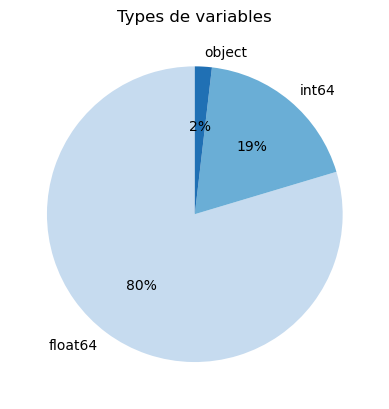

In [10]:
#Type de données
info_model_Conso_BEB_2016 = compl_info(model_Conso_BEB_2016).T.sort_values("Pourcentage remplissage").reset_index()
info_model_Conso_BEB_2016 = info_model_Conso_BEB_2016.rename(columns={'index':'Variable'})

dTypes = info_model_Conso_BEB_2016['Type'].value_counts()
blues3 = sns.color_palette(palette="Blues", n_colors =3)

plt.pie(dTypes.values.tolist(), labels=['float64','int64', 'object'], colors = blues3, autopct='%.0f%%', startangle=90)
plt.title("Types de variables")
plt.show()

<a id='pre_processing'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Pre-processing** </span></span>


<a id='data_stratification'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Stratification des données </span>

In [11]:

# Creation d'une variable catégorielle fondée dans les quantiles pour faciliter l'échantillonage stratifié
model_Conso_BEB_2016['SiteEnergyUseWN_cat'] = pd.cut(model_Conso_BEB_2016['SiteEnergyUseWN(kBtu)'], 
                                                   bins=[0, np.quantile(model_Conso_BEB_2016['SiteEnergyUseWN(kBtu)'], 0.25),
                                                         np.quantile(model_Conso_BEB_2016['SiteEnergyUseWN(kBtu)'], 0.5),
                                                         np.quantile(model_Conso_BEB_2016['SiteEnergyUseWN(kBtu)'], 0.75), np.inf],
                                                   labels=['0-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-inf'], include_lowest=True)


<a id=' trainSet_testSet'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Découpage données entrainement et test </span>

In [12]:

# Choix de la valeur de base pour le générateur aléatoire
randomN = 84

# Découpage des données train/test avec stratification
split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=randomN)

for train_index, test_index in split.split(model_Conso_BEB_2016, model_Conso_BEB_2016['SiteEnergyUseWN_cat']):
    strat_train_set = model_Conso_BEB_2016.loc[train_index]
    strat_test_set = model_Conso_BEB_2016.loc[test_index]


<a id=' MatriceX_vecteury'></a>

---

## <span style='background:#2a679a'><span style='color:white'>  Matrice X et vecteur y </span>

**Matrice X**

In [13]:

# Matrice X
X_train = strat_train_set.drop(columns=['SiteEnergyUseWN(kBtu)','SiteEnergyUseWN_cat'], axis=1)
print("X_train " +str(X_train.shape))

X_test = strat_test_set.drop(columns=['SiteEnergyUseWN(kBtu)','SiteEnergyUseWN_cat'], axis=1)
print("X_test " +str(X_test.shape) +"\n")


X_train (1257, 53)
X_test (315, 53)



**Vecteur y**

In [14]:

# Variable cible, consomation = 'SiteEnergyUseWN' 
y_train = strat_train_set['SiteEnergyUseWN(kBtu)'].copy()
print("y_train " +str(y_train.shape))

y_test = strat_test_set['SiteEnergyUseWN(kBtu)'].copy()
print("y_test " +str(y_test.shape) +"\n")


y_train (1257,)
y_test (315,)



<a id='scaling_variables_categorielles'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Encodage des variables catégorielles </span>

In [15]:

# Variables qualitatives
vari_quali = ['Neighborhood']

# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données 
X_train[vari_quali] = target_encoder.fit_transform(X_train[vari_quali], y_train)
X_test[vari_quali] = target_encoder.transform(X_test[vari_quali])

X_train[['Neighborhood']]

Neighborhood
1020  5.810975e+06
1030  4.381761e+06
119   4.381761e+06
957   5.810975e+06
1456  4.381761e+06
...            ...
474   4.381761e+06
618   1.124197e+07
1552  4.381761e+06
429   1.124197e+07
1331  6.288238e+06

[1257 rows x 1 columns]

<a id='feature_scaling'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Feature scaling </span>

**MinMaxScaler**

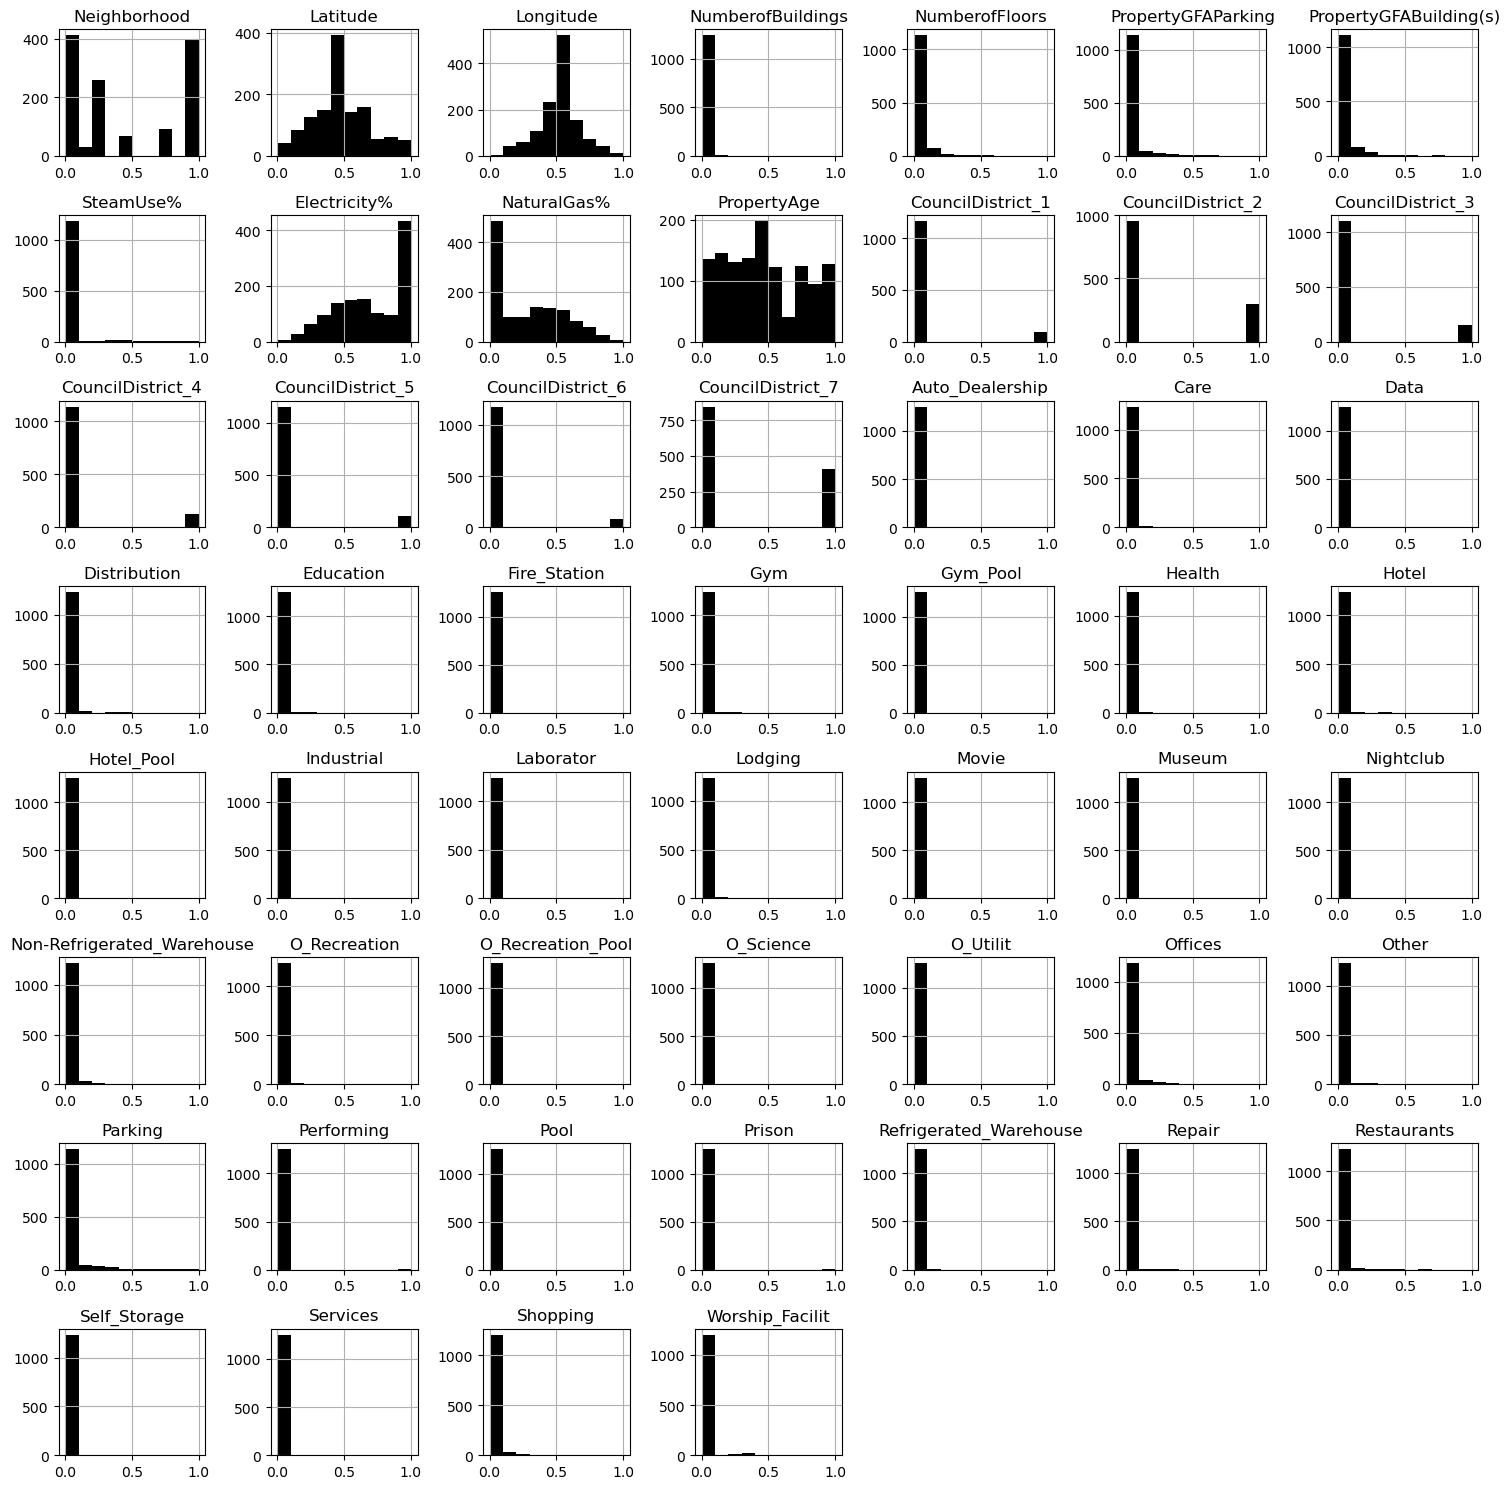

In [16]:

vari_quanti = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_train_MM = X_train.copy()
X_test_MM = X_test.copy()

#MinMaxScaler
scaler_MinMax = MinMaxScaler(feature_range=(0, 1)) 

# Scaling
X_train_MM[vari_quanti] = scaler_MinMax.fit_transform(X_train_MM[vari_quanti])
X_test_MM[vari_quanti] = scaler_MinMax.transform(X_test_MM[vari_quanti])

# Dataset pour la modélisation
X_train_MM.hist(bins = 10, figsize = (15,15), color = 'black')
plt.tight_layout() 
plt.show()


**RobustScaler**

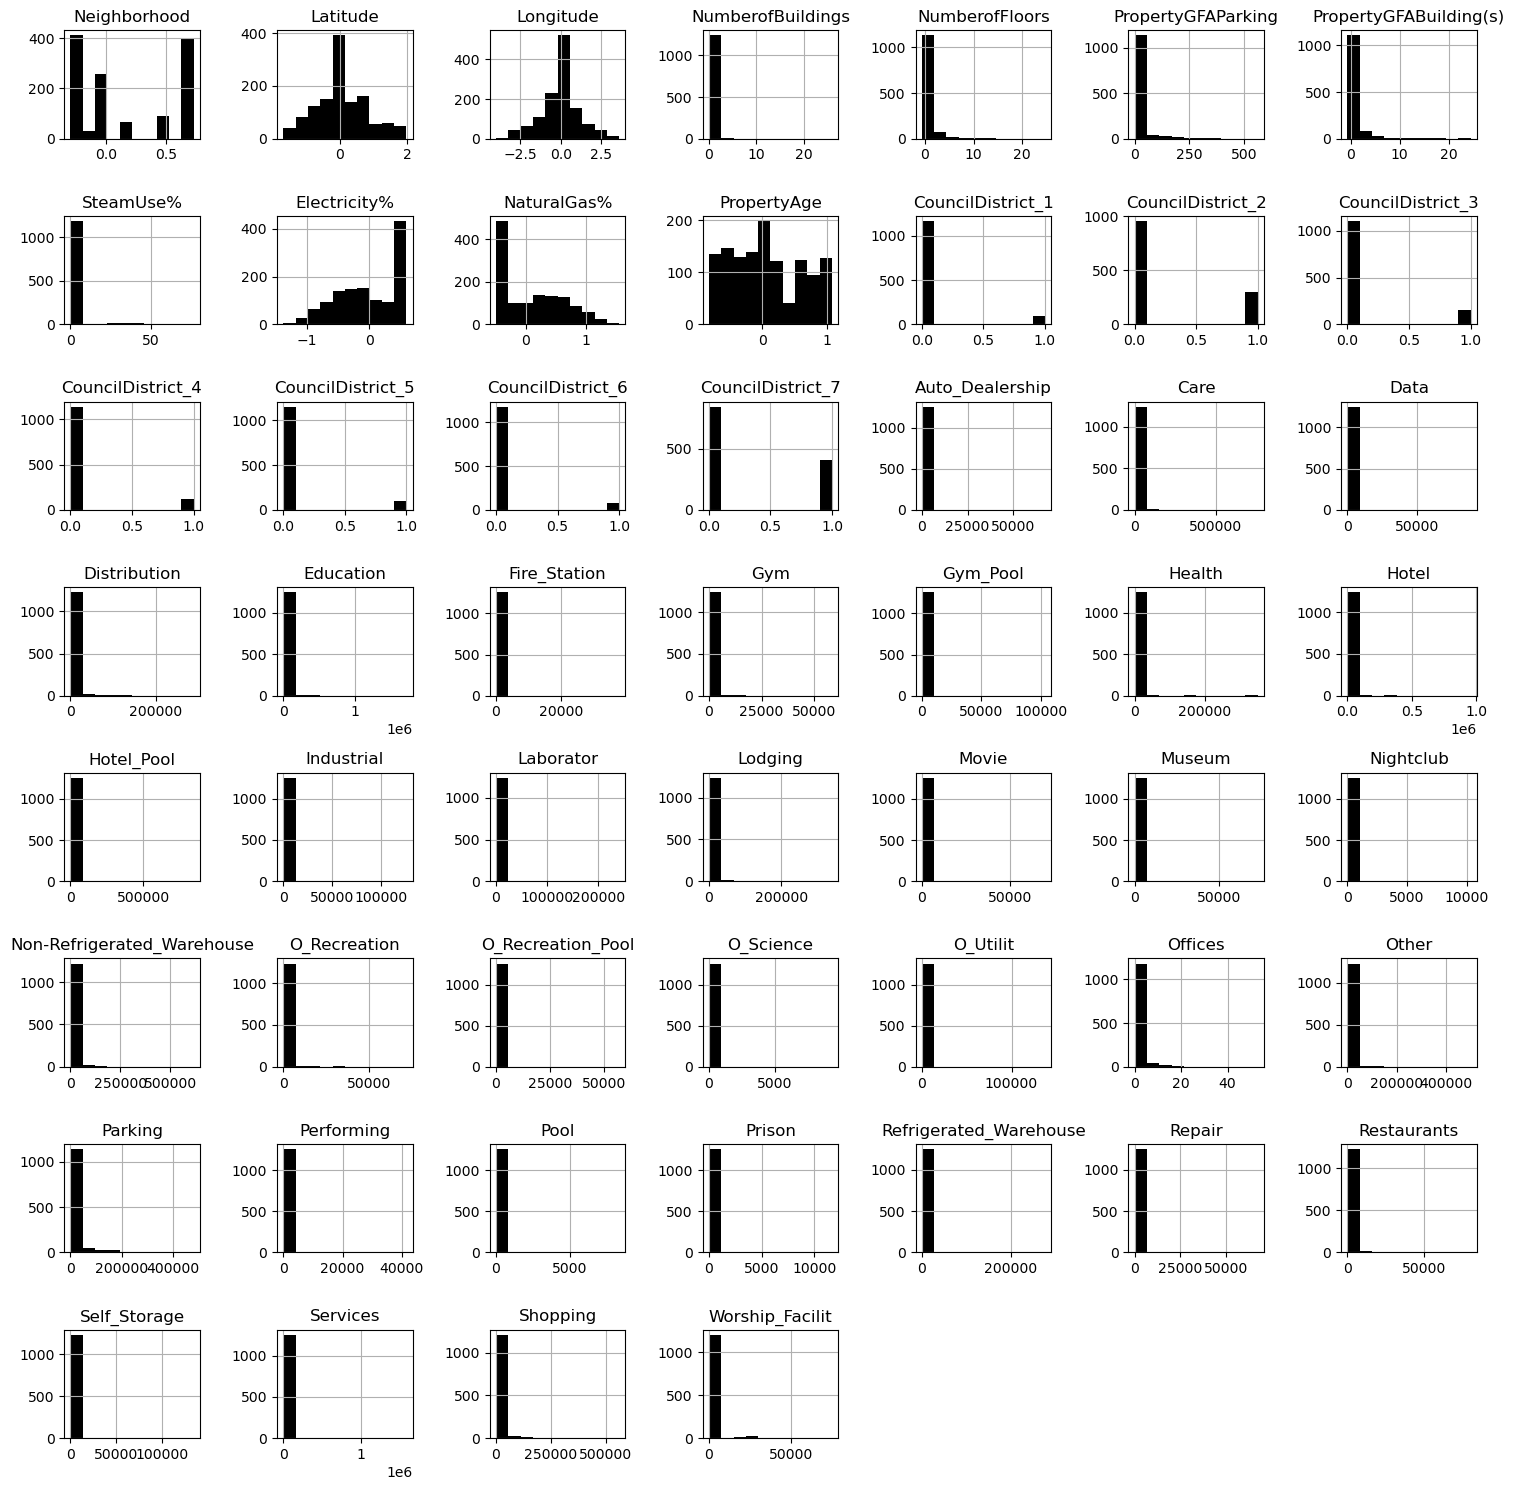

In [17]:

#RobustScaler, moins impacté par les outliers (n'asume pas normalité)
scaler_RobS = RobustScaler()

X_train_RS = X_train.copy()
X_test_RS = X_test.copy()

# Scaling
X_train_RS[vari_quanti] = scaler_RobS.fit_transform(X_train_RS[vari_quanti])
X_test_RS[vari_quanti] = scaler_RobS.transform(X_test_RS[vari_quanti])

# Dataset pour la modélisation
X_train_RS.hist(bins = 10, figsize = (15,15), color = 'black')
plt.tight_layout() 
plt.show()



**StandardScaler**

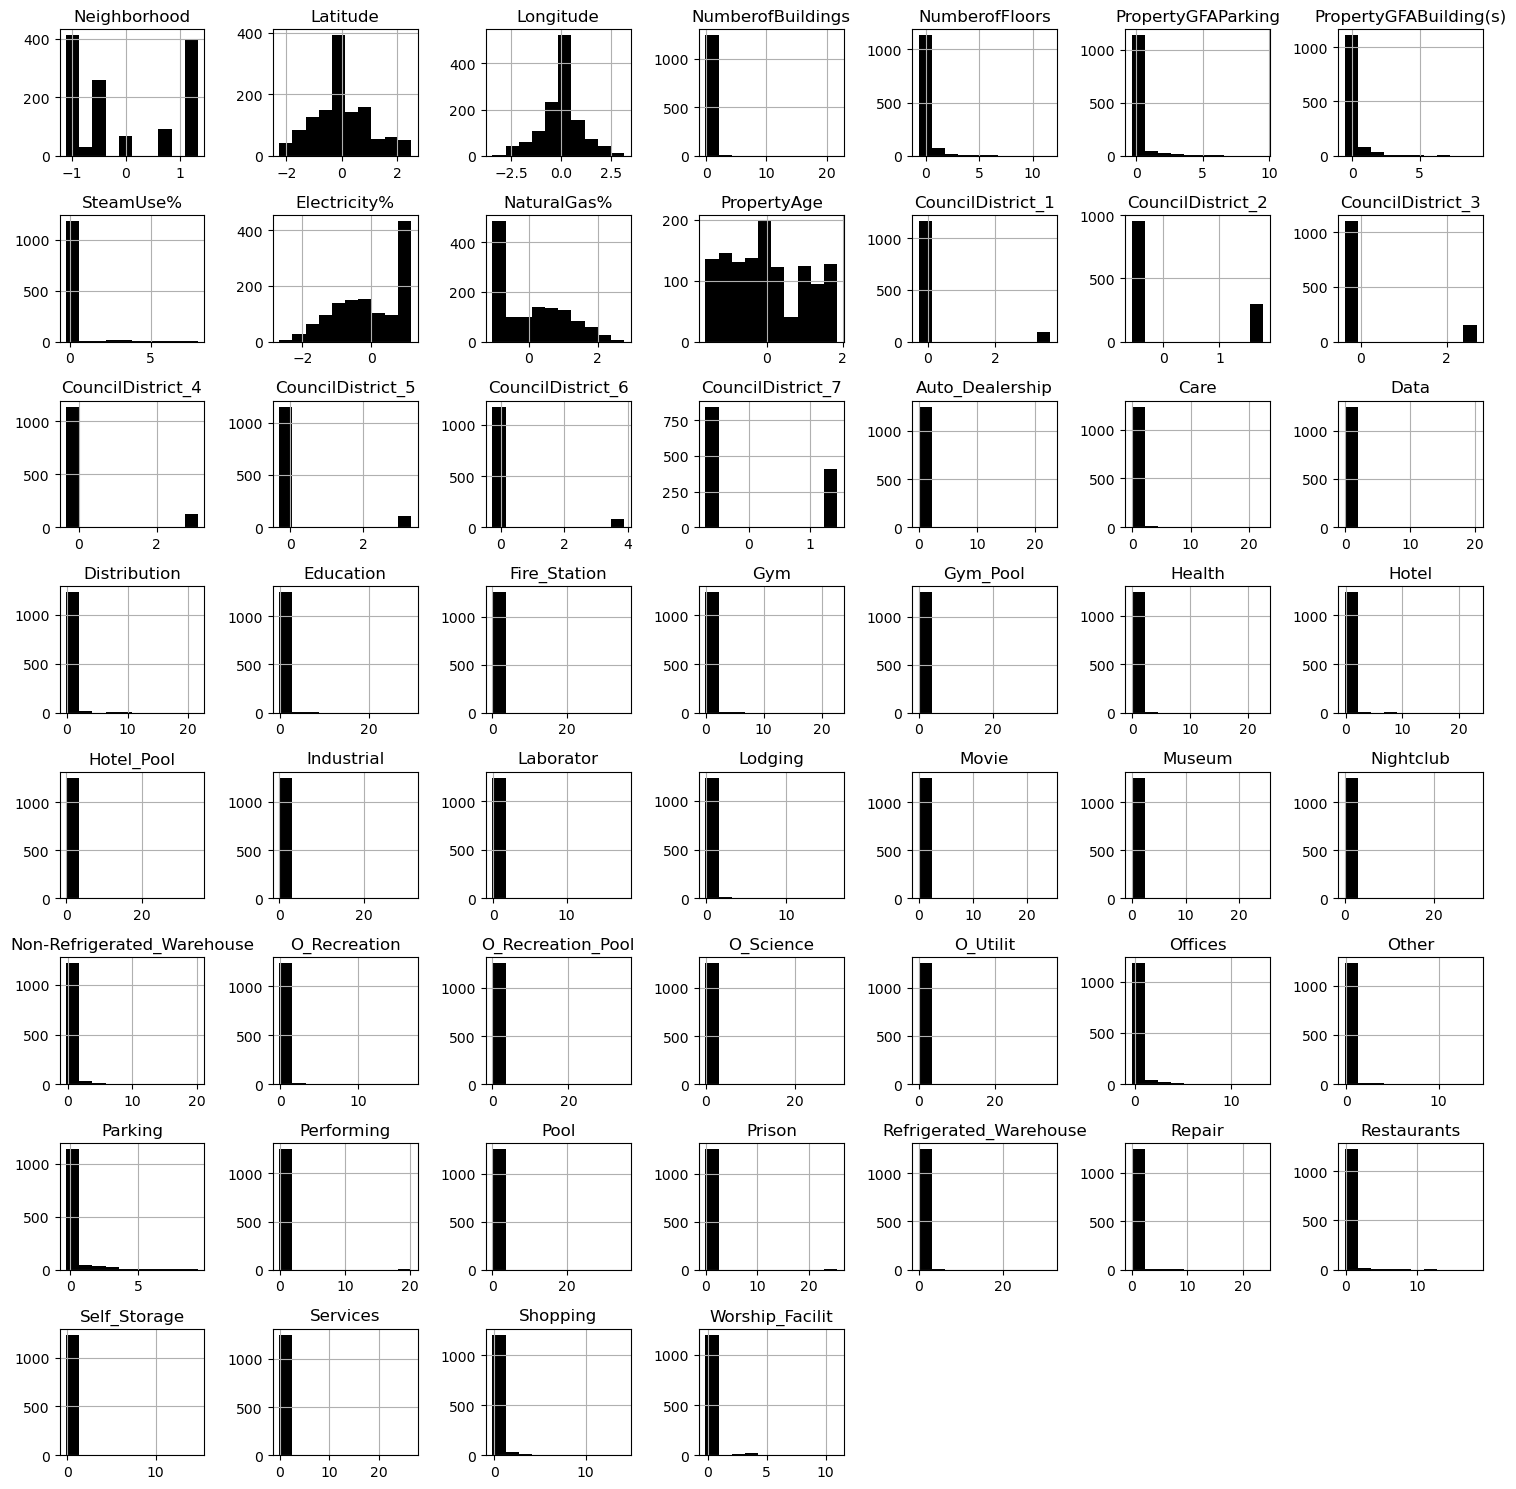

In [18]:

#RobustScaler, moins impacté par les outliers (n'asume pas normalité)
scaler_stdS = StandardScaler()

X_train_stdS = X_train.copy()
X_test_stdS = X_test.copy()

# Scaling
X_train_stdS[vari_quanti] = scaler_stdS.fit_transform(X_train_stdS[vari_quanti])
X_test_stdS[vari_quanti] = scaler_stdS.transform(X_test_stdS[vari_quanti])

# Dataset pour la modélisation
X_train_stdS.hist(bins = 10, figsize = (15,15), color = 'black')
plt.tight_layout() 
plt.show()



<a id='Test_algo_ML'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Test de differents algorithmes de Machine Learning** </span></span>


<a id='baseline'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Baseline : Approches de régression naïves </span>

Nous utiliserons une approche de régression naïve pour établir une base de référence (Baseline) à laquelle nous pourrons comparer les résultats des différents modèles à tester.

In [19]:

# Selection de la meilleure strategie pour la baseline

dummy_param_grid = [{'strategy': ['mean', 'median']}]
dummy_regr = DummyRegressor()

dummy_test = model_selection.GridSearchCV(dummy_regr,dummy_param_grid,cv=5, scoring='r2')
dummy_test.fit(X_train_RS, y_train)


GridSearchCV(cv=5, estimator=DummyRegressor(),
             param_grid=[{'strategy': ['mean', 'median']}], scoring='r2')

In [20]:

# Selection de la meilleure strategie pour la baseline
print (dummy_test.best_params_)


{'strategy': 'mean'}


In [21]:

# Création d'un dataframe pour enregistrer les résultats de la baseline
df_resultats_algo = pd.DataFrame(dtype='object')


In [22]:

# Création d'un dataframe pour enregistrer les résultats des algorithmes
df_resultats_dummy = pd.DataFrame(dtype='object')


In [23]:

# MinMax
# DummyRegressor mean 
# -----------------------------------------------------------------------
dummy_mean = DummyRegressor(strategy='mean')
df_resultats_dummy, y_pred = process_regression(dummy_mean, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_dummy,
                                               'DummyRegressorMean', 'MinMaxScaler', '1er entraînement',
                                                 False, False, False, False)


In [24]:

# RobustScaler
# DummyRegressor mean 
# -----------------------------------------------------------------------
df_resultats_dummy, y_pred = process_regression(dummy_mean, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_dummy,
                                               'DummyRegressorMean', 'RobustScaler', '1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

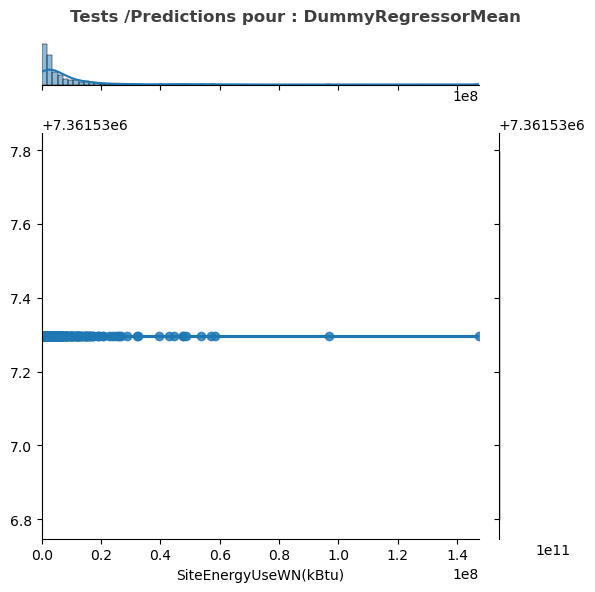

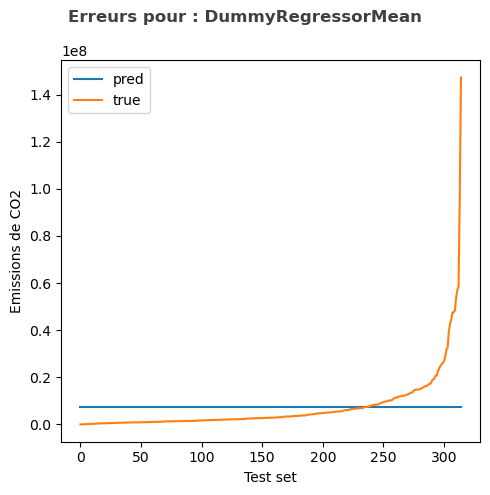

In [25]:

#Standard Scaler
# DummyRegressor mean 
# -----------------------------------------------------------------------
df_resultats_dummy, y_pred = process_regression(dummy_mean, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_dummy,
                                               'DummyRegressorMean', 'StandardScaler', '1er entraînement',
                                               True, True, True,False)


In [26]:

# Sélection du meilleur résultat comme baseline
df_baseline = df_resultats_dummy.loc[df_resultats_dummy['Scaler']=='StandardScaler']


<a id='Model_linear'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Modèles lineaires </span>

<a id='reg_lineaire_nonRegul'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire no régularisée**</span></span>

 **Estimation des valeurs des variables cible grâce à une combinaison linéaire des variables utilisées pour représenter lesdites données**

In [27]:

# Linear regression
# -----------------
model_LR = LinearRegression()


In [28]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


In [29]:

#Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression','RobustScaler','1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

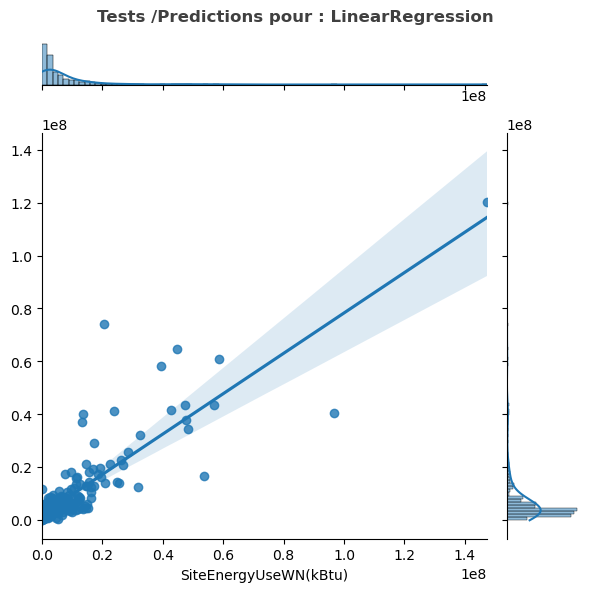

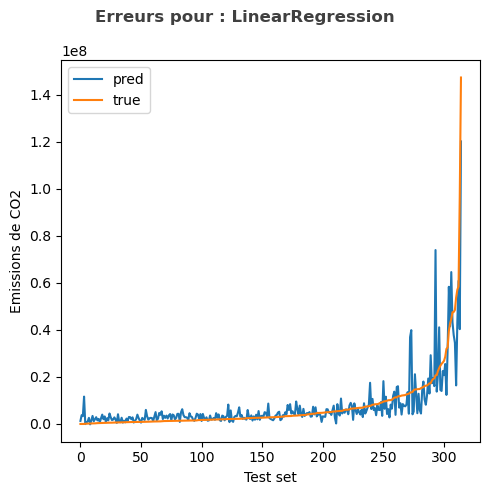

In [30]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression','StandardScaler','1er entraînement',
                                               True, True, True,False)


**Ajouter des commentaires sur l'interpretation des aspects les plus intéresants**

<a id='reg_lineaire_RIDGE'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire RIDGE**</span></span>


Pour limiter le sur-apprentissage, on peut utiliser une technique, la régularisation, qui consiste à contrôler simultanément l'erreur du modèle sur le jeu d'entraînement et la complexité du modèle. 

La régression ridge permet d'éviter le surapprentissage en restraignant l'amplitude des poids.

La régularisation ridge utilise pour régulariser la régression linéaire le carré de la norme du vecteur de poids. Plus précisément, il s'agit de la norme ℓ2, ou norme euclidienne.


In [31]:

# Ridge Regression
# -----------------
model_Ridge = Ridge(random_state=randomN)


In [32]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


In [33]:

# Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','RobustScaler','1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

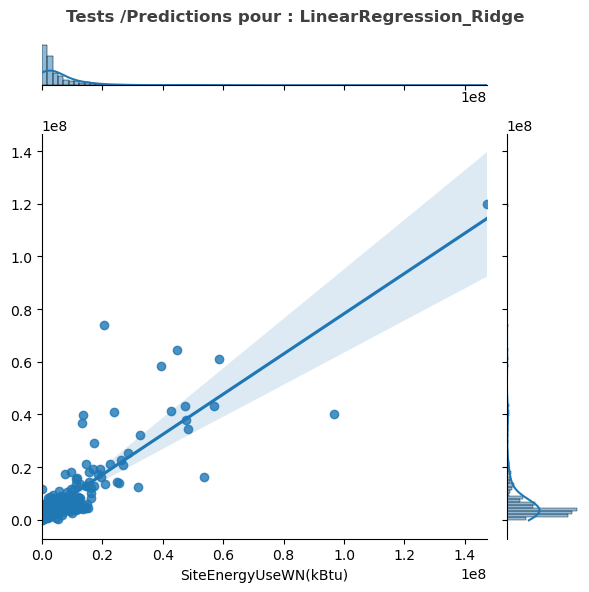

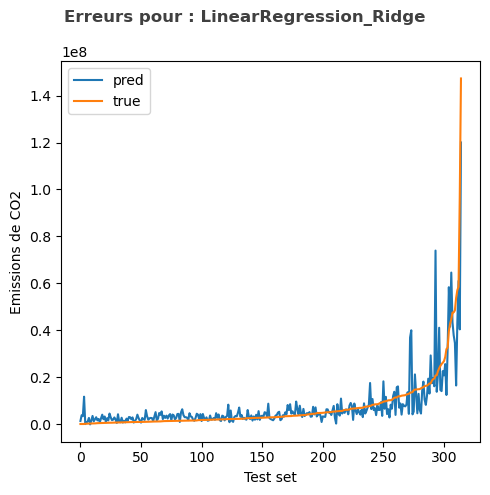

In [34]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               True, True, True,False)


**Ajouter des commentaires sur l'interpretation des aspects les plus intéresants**

<a id='reg_lineaire_LASSO'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire LASSO**</span></span>


La régression linéaire LASSO (pour Least Absolute Shrinkage and Selection Operator) permets d'établir un modèle plus parcimonieux, pour ceci on utilise la norme ℓ1 du vecteur β comme régularisateur.

Il s'agit donc d'une méthode de sélection de variables et de réduction de dimension supervisée.


In [35]:

# Lasso Regression
# -----------------
model_LASSO = Lasso(random_state=randomN)


In [36]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_Lasso','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


In [37]:

# Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_Lasso','RobustScaler','1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

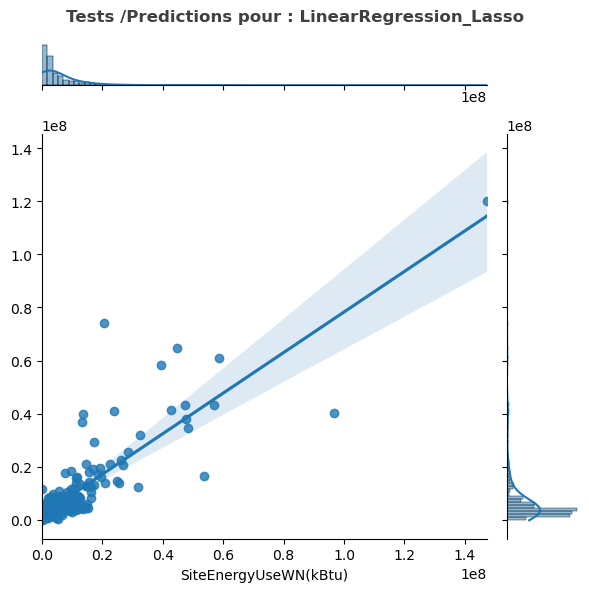

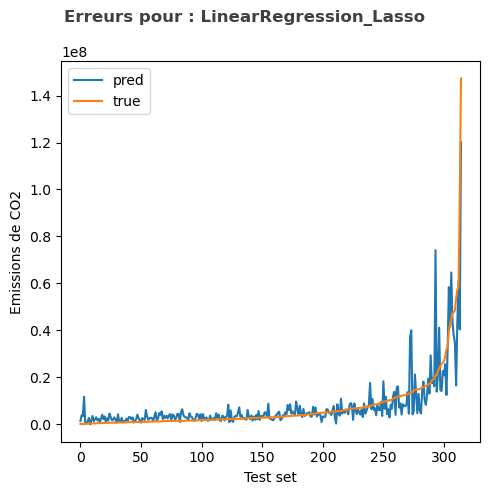

In [38]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_Lasso','StandardScaler','1er entraînement',
                                               True, True, True,False)


<a id='reg_lineaire_ElasticNet'></a>

### <span style='background:#358ab7'><span style='color:white'>**Régression linéaire Elastic Net**</span></span>


L'elastic net combine les normes ℓ1 et ℓ2 pour obtenir une solution moins parcimonieuse que le lasso, mais plus stable et dans laquelle toutes les variables corrélées pertinentes pour la prédiction de l'étiquette sont sélectionnées et reçoivent un poids identique.


In [39]:

# Elastic Net Regression
# ----------------------
model_ElasticNet = ElasticNet(random_state=randomN)


In [40]:

# MinMax Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_ElasticNet, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_ElasticNet','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


In [41]:

# Robust Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_ElasticNet, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_ElasticNet','RobustScaler','1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

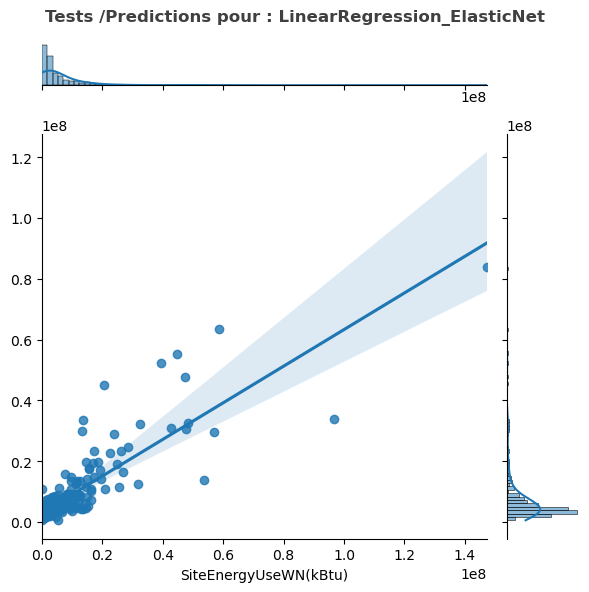

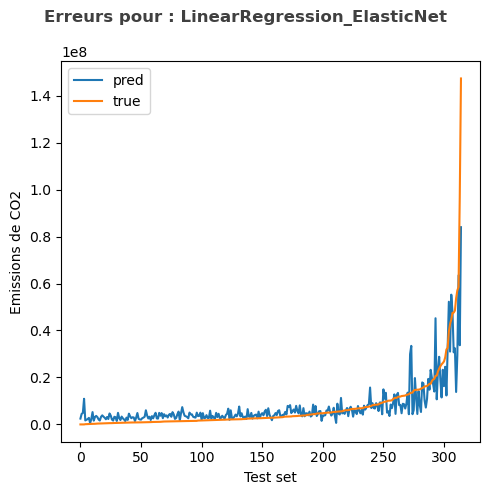

In [42]:

# Standard Scaler
# -----------------
df_resultats_algo, y_pred = process_regression(model_ElasticNet, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'LinearRegression_ElasticNet','StandardScaler','1er entraînement',
                                               True, True, True,False)


<a id='Model_NON_linear'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Modèles NON lineaires </span>

<a id='SVR'></a>

### <span style='background:#358ab7'><span style='color:white'>**SVR - Support Vector Regressor kernel non linéaire**</span></span>


Les modèles 'Support Vector Machine' (SVM) cherchent des hyperplans de marge maximale. 
Dans certains cas il n'éxiste pas de séparateur linéaire. Afin de remédier à ce problème, on utlise l'astuce du noyau (en anglais kernel trick). C'est à dire on reconsidère le problème dans un espace de dimension supérieure, éventuellement de dimension infinie. Dans ce nouvel espace, il est alors probable qu'il existe une séparation linéaire.

Les modèles SVR ce sont des càs particuliers de SVM à noyau pour la régression.


In [43]:

# Régression SVR
# ---------------
model_svr = SVR(kernel='rbf')


In [44]:

# MinMax Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_svr, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'SVR','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


In [45]:

# Robust Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_svr, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo
                                               ,'SVR','RobustScaler','1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

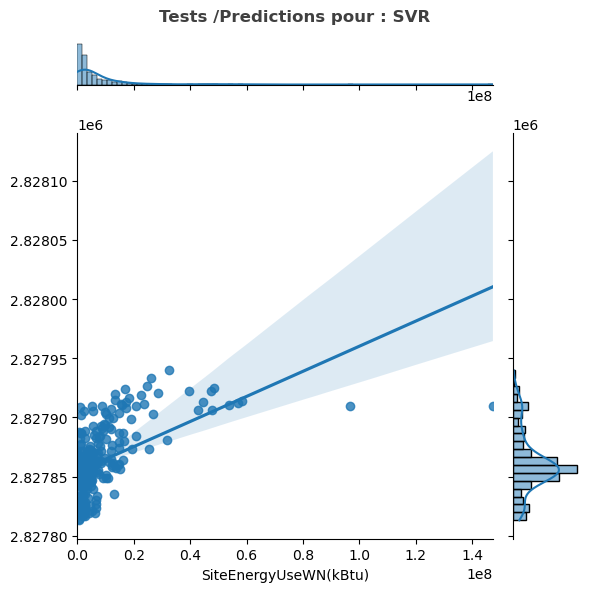

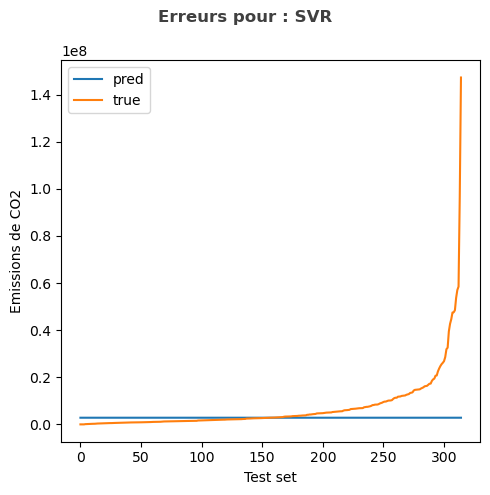

In [46]:

# Standard Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_svr, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'SVR','StandardScaler','1er entraînement',
                                               True, True, True,False)


**Ajouter des commentaires sur l'interpretation des aspects les plus intéresants**

<a id='KNR'></a>

### <span style='background:#358ab7'><span style='color:white'>**K-Neighbors Regressor**</span></span>


Régression basée sur les k plus proches voisins.

La y_pred est prédite par interpolation locale des y_train associées aux plus proches voisins dans X_train.


In [47]:

# Régression KNR
# ---------------
model_KNR = KNeighborsRegressor()


In [48]:

# MinMax Scaler
df_resultats_algo, y_pred = process_regression(model_KNR, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'K_NeighborsRegression','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f45ffc6d160>
Traceback (most recent call last):
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

In [49]:

# Robust Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_KNR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'K_NeighborsRegression','RobustScaler','1er entraînement',
                                               False, False, False,False)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4604323940>
Traceback (most recent call last):
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4604323940>
Traceback (most recent call last):
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/raquelsp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

<Figure size 500x500 with 0 Axes>

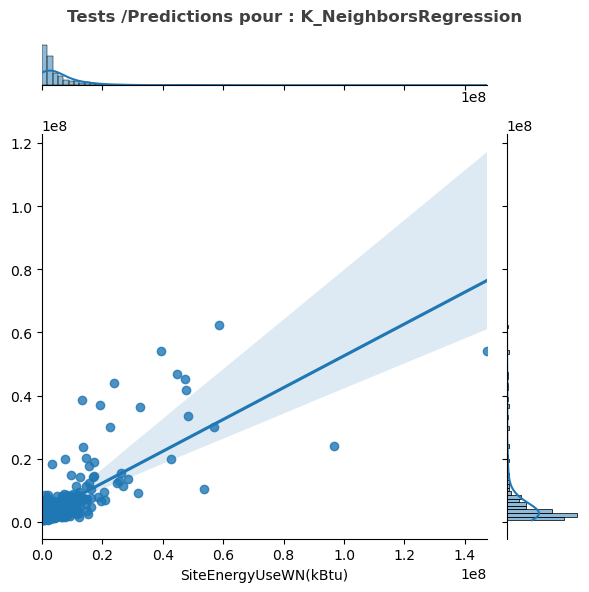

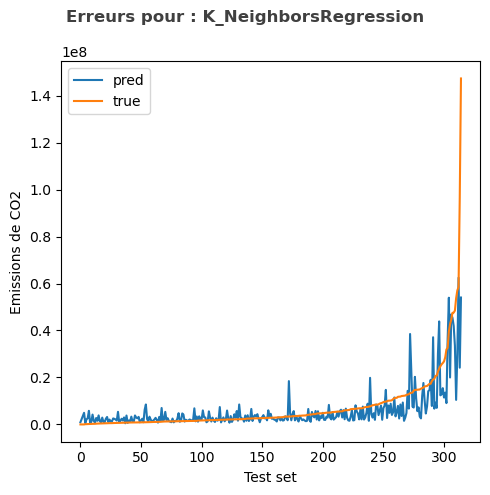

In [50]:

# Standard Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_KNR, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'K_NeighborsRegression','StandardScaler','1er entraînement',
                                               True, True, True,False)


<a id='random_Forest'></a>

### <span style='background:#358ab7'><span style='color:white'>**Random Forest Regressor**</span></span>


Méthode de bagging où les arbres profonds (low bias, high variance), ajustés sur des échantillons bootstrap de données et des sous-ensembles aléatoires de features, sont combinés (moyenne des prédictions pour tous les arbres pour la régression) pour produire une sortie avec une variance plus faible.


In [51]:

# Régression Random Forest
# ------------------------
model_RF = RandomForestRegressor(random_state=randomN)


In [52]:

# MinMax Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'Random_Forest','MinMaxScaler','1er entraînement',
                                               False, False, False,False)


In [53]:

# Robust Scaler
# -------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'Random_Forest','RobustScaler','1er entraînement',
                                               False, False, False,False)


<Figure size 500x500 with 0 Axes>

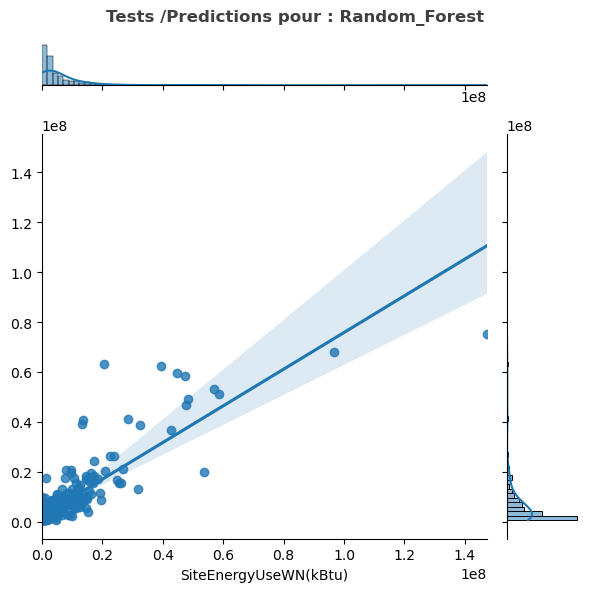

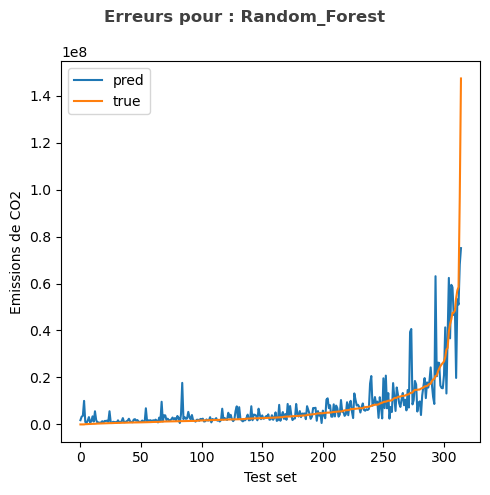

In [54]:

# Standard Scaler
# ---------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'Random_Forest','StandardScaler','1er entraînement',
                                               True, True, True,False)


**Visualisation de l'arbre de décision de Random Forest**

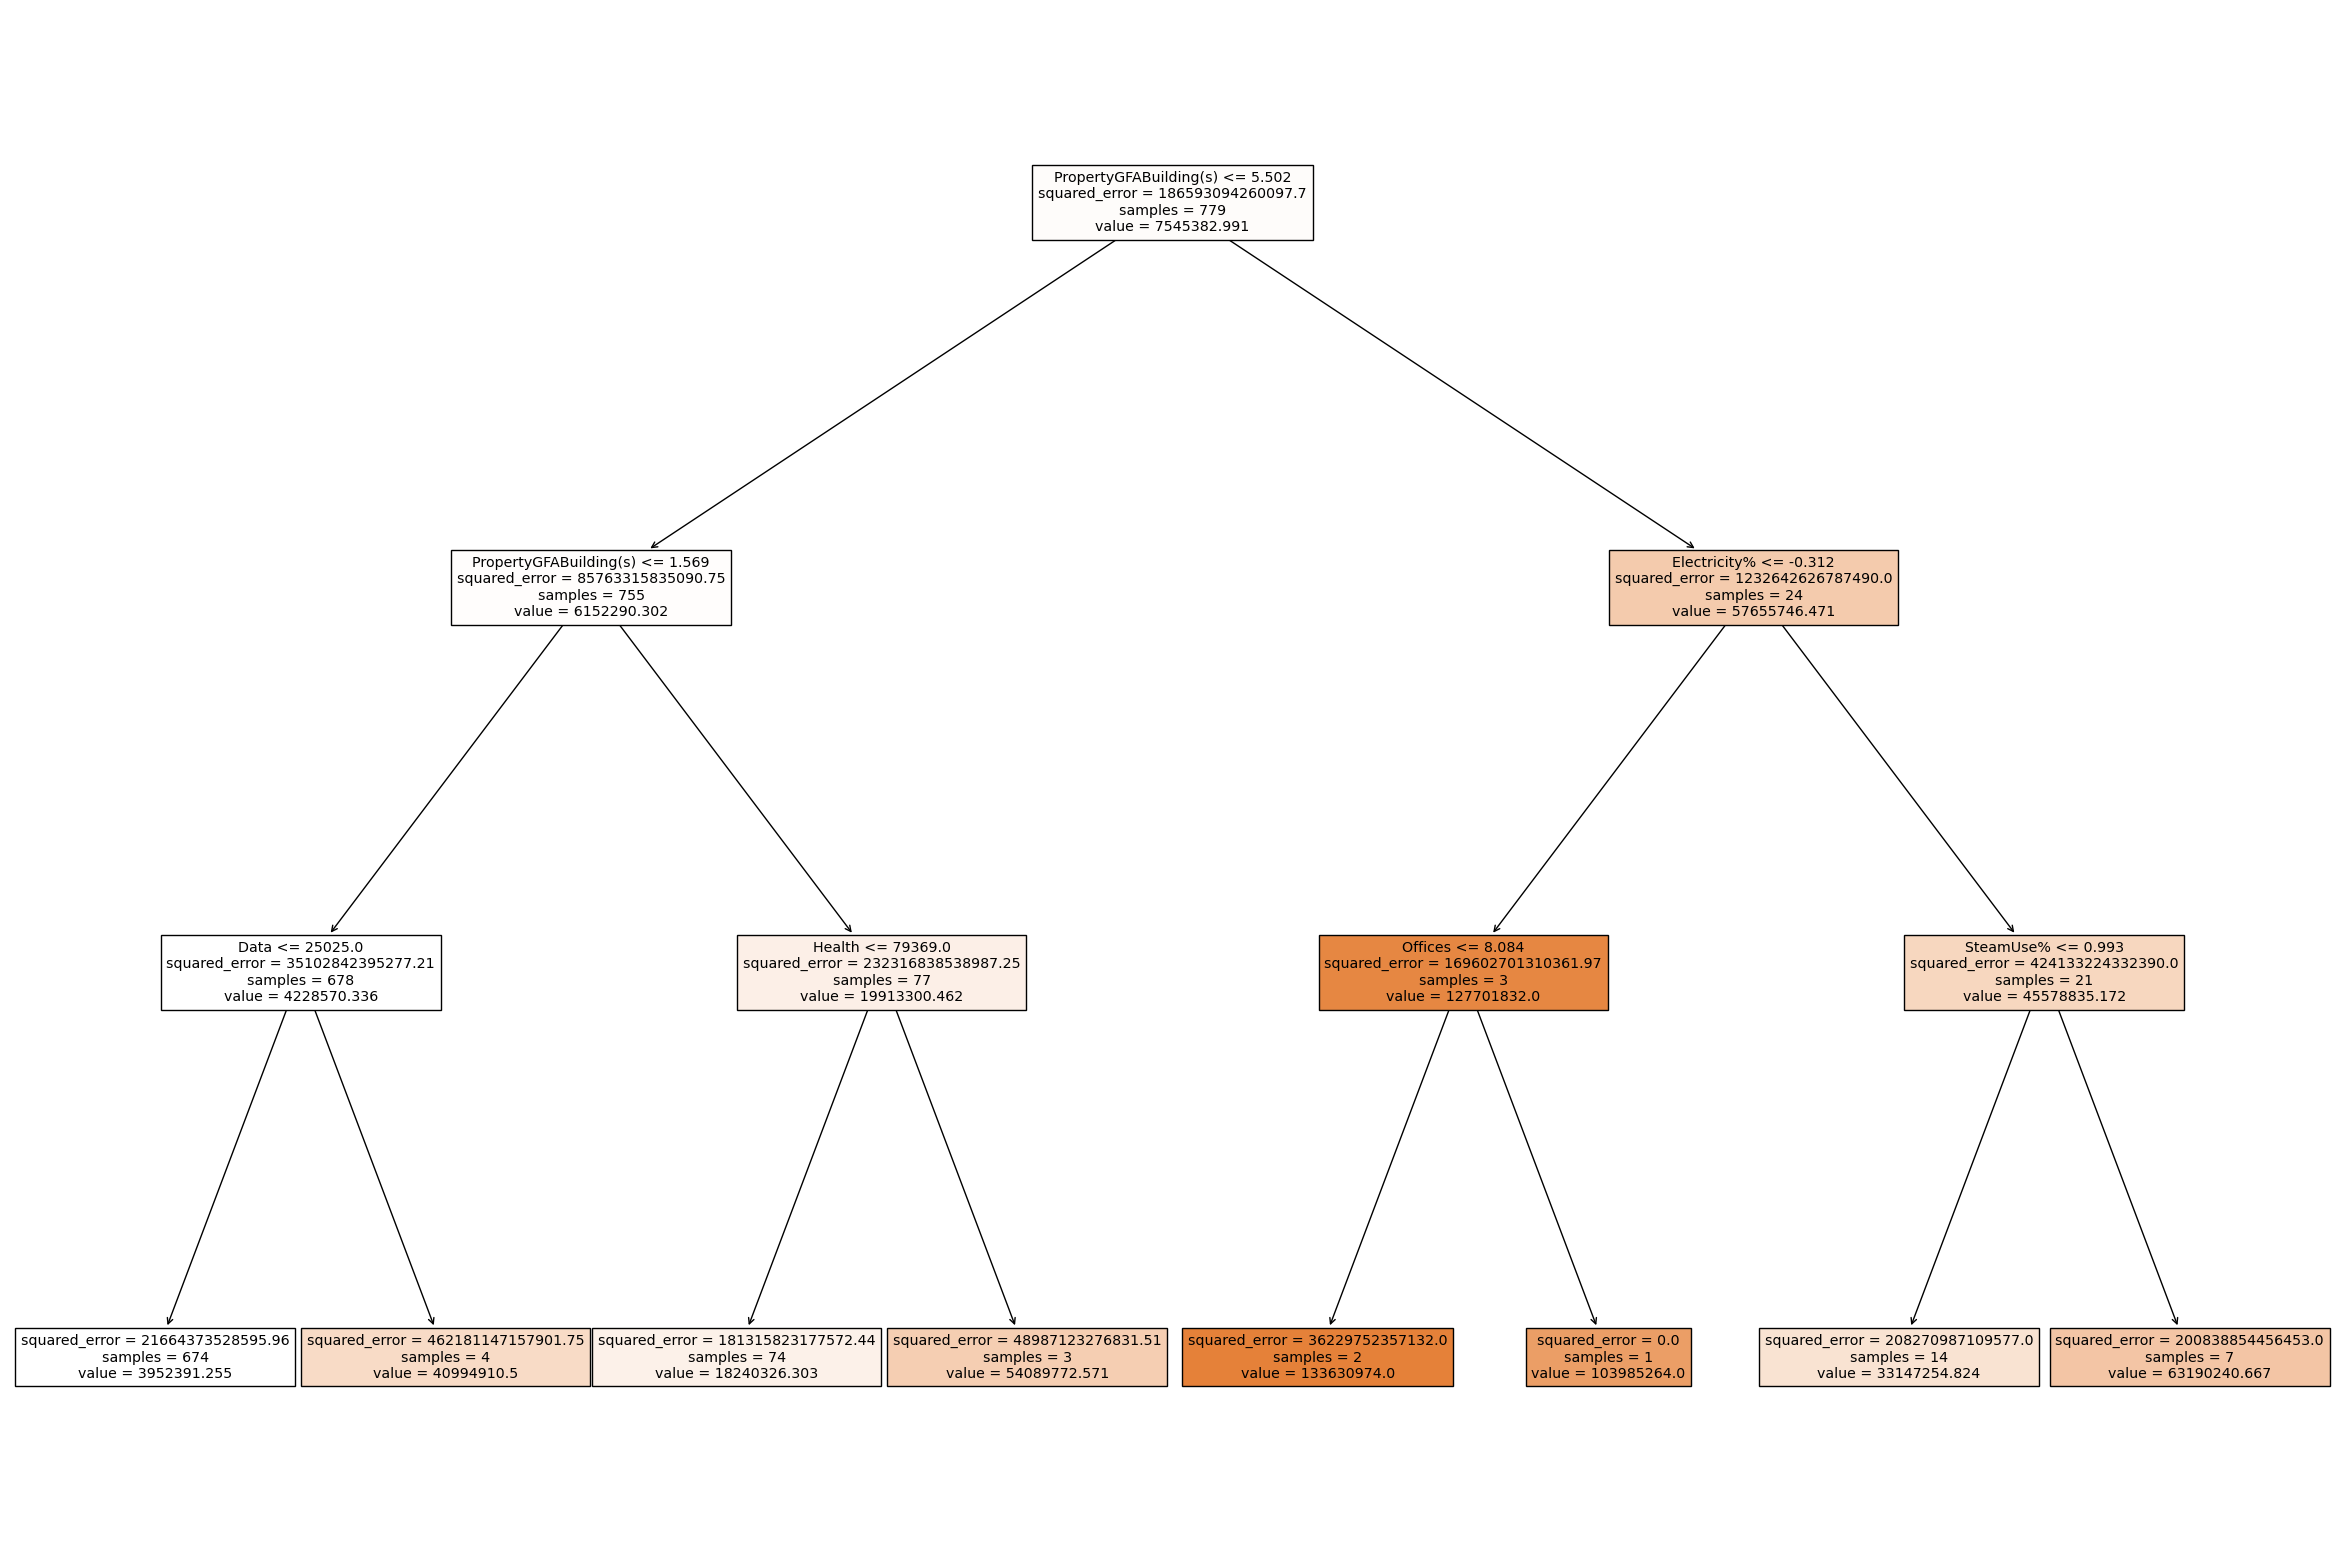

In [55]:
RF_visu = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=randomN)

# Entraînement du modèle
RF_visu.fit(X_train_RS, y_train)

# Prédictions avec le test set
y_pred = RF_visu.predict(X_test_RS)

# Visualisation avec tree de sklearn
plt.figure(figsize=(30, 20))
vis = tree.plot_tree(RF_visu.estimators_[0], feature_names=X_train_RS.columns, filled=True)
plt.show()


<a id='adaBoost'></a>

### <span style='background:#358ab7'><span style='color:white'>**Ada Boost Regressor**</span></span>

Un *AdaBoost Regressor* est un méta-estimateur qui commence par ajuster un régresseur sur l'ensemble de données original. Par la suite, il ajuste des copies additionnelles du régresseur sur le même ensemble de données avec des poids des instances ajustés en fonction de l'erreur de la prédiction actuelle. Ainsi, les régresseurs suivants se concentrent davantage sur les cas difficiles.

In [56]:

# Régression  LightGBM
# ---------------------
model_adaBoost = AdaBoostRegressor(random_state=randomN)


In [57]:

# MinMax Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_adaBoost, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'Ada_Boost','MinMaxScaler','1er entraînement',
                                               False,False, False, False)


In [58]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_adaBoost, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'Ada_Boost','RobustScaler','1er entraînement',
                                               False,False, False, False)


<Figure size 500x500 with 0 Axes>

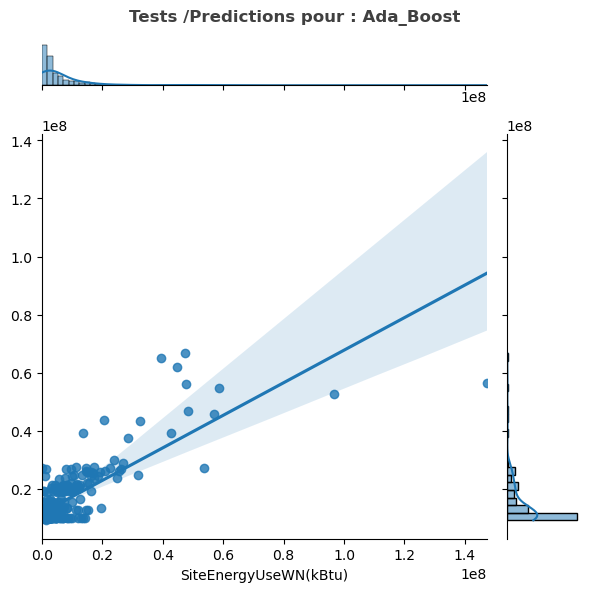

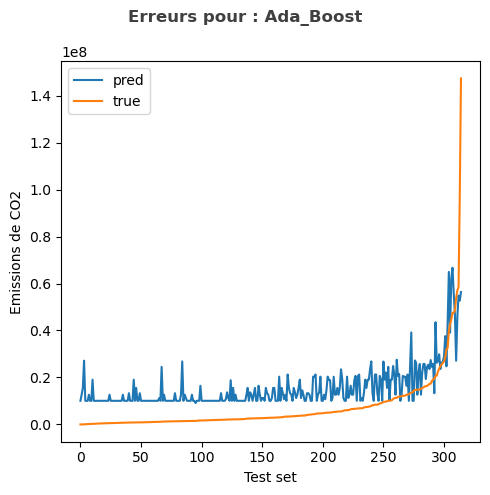

In [59]:

# Standard Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_adaBoost, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'Ada_Boost','StandardScaler','1er entraînement',
                                               True, True, True,False)


<a id='Gradient_Boosting'></a>

### <span style='background:#358ab7'><span style='color:white'>**Gradient Boosting Regressor**</span></span>

Cet estimateur construit un modèle de nature additive en procédant par étapes ; il permet l'optimisation de fonctions de perte différentiables arbitraires. À chaque étape, un arbre de régression est ajusté sur le gradient négatif de la fonction de perte donnée.

In [60]:

# Régression Gradient Boosting
# ----------------------------
model_GBR = GradientBoostingRegressor(random_state=randomN, verbose=False)


In [61]:

# MinMax Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'Gradient_Boosting','MinMaxScaler','1er entraînement',
                                               False,False, False, False)


In [62]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'Gradient_Boosting','RobustScaler','1er entraînement',
                                               False,False, False, False)


<Figure size 500x500 with 0 Axes>

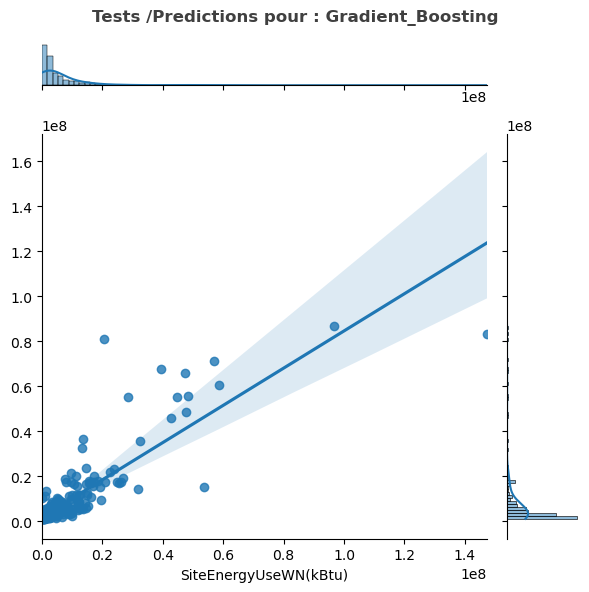

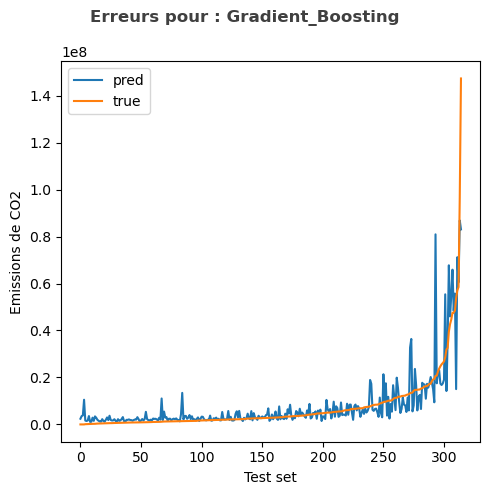

In [63]:

# Standard Scaler
# ----------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'Gradient_Boosting','StandardScaler','1er entraînement',
                                               True, True, True,False)


<a id='LightGBM'></a>

### <span style='background:#358ab7'><span style='color:white'>**Light Gradient Boosting Machine**</span></span>

LightGBM est un outil de 'Gradient Boosting' basé sur des arbres de décision pour augmenter l'efficacité du modèle et réduire l'utilisation de la mémoire.

In [64]:

# Régression  LightGBM
# ---------------------
model_lgbm = LGBMRegressor(random_state=randomN)


In [65]:

# MinMax Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'Light_GBM','MinMaxScaler','1er entraînement',
                                               False,False, False, False)


In [66]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'Light_GBM','RobustScaler','1er entraînement',
                                               False,False, False, False)


<Figure size 500x500 with 0 Axes>

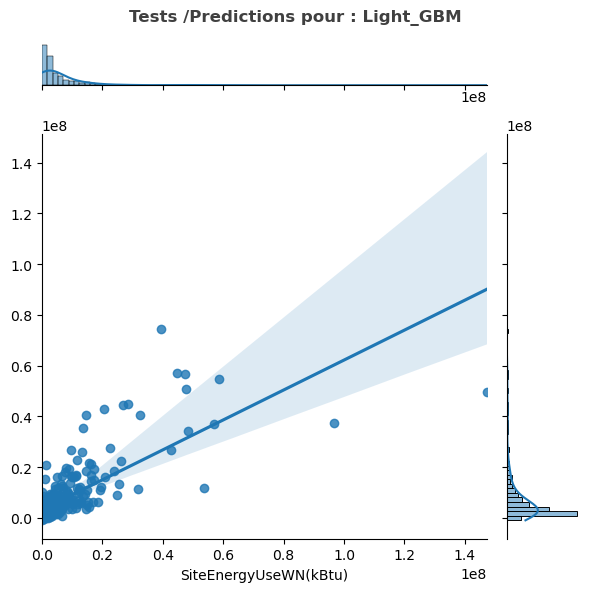

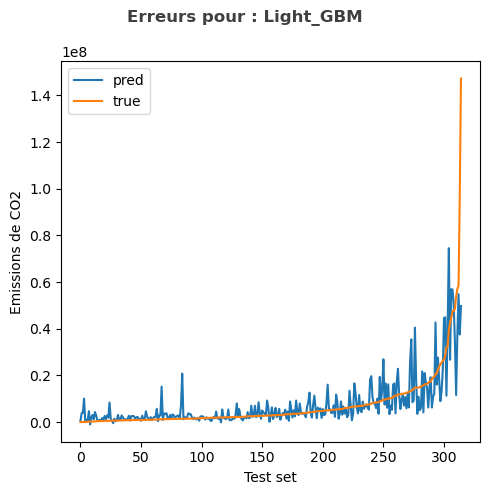

In [67]:

# Standard Scaler
# ---------------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,
                                               'Light_GBM','StandardScaler','1er entraînement',
                                               True, True, True,False)


<a id='bilan_algorithmes'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Bilan des algorithmes testés </span>

**Tableau de résultats des scores par modèle**

In [68]:

bilan_algo = df_resultats_algo.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_algo.style.hide(axis="index")


In [69]:

# Comparaison des 3 algorithmes les plus performants
df_compar = bilan_algo.loc[((bilan_algo["Modèle"] == 'LinearRegression_Ridge') &(bilan_algo["Scaler"] == 'StandardScaler')) | 
                           ((bilan_algo["Modèle"] == 'LinearRegression') &(bilan_algo["Scaler"] == 'RobustScaler'))  |
                           ((bilan_algo["Modèle"] == 'LinearRegression_Lasso') &(bilan_algo["Scaler"] == 'MinMaxScaler')) ]

df_compar

Modèle          Scaler    Durée       R2        MAE  \
0  LinearRegression_Ridge  StandardScaler  0.02034  0.74144  3224572.0   
0  LinearRegression_Lasso    MinMaxScaler  0.10460  0.74116  3225204.0   
0        LinearRegression    RobustScaler  0.04674  0.74116  3225228.0   

            MSE       RMSE  CV Train R2  CV Test R2  CV Train MSE  \
0  4.568366e+13  6758968.5     0.769034    0.469837  3.814092e+13   
0  4.573293e+13  6762612.7     0.769056    0.466528  3.813733e+13   
0  4.573421e+13  6762707.1     0.769056    0.466394  3.813733e+13   

    CV Test MSE  
0  7.856211e+13  
0  7.897504e+13  
0  7.899172e+13

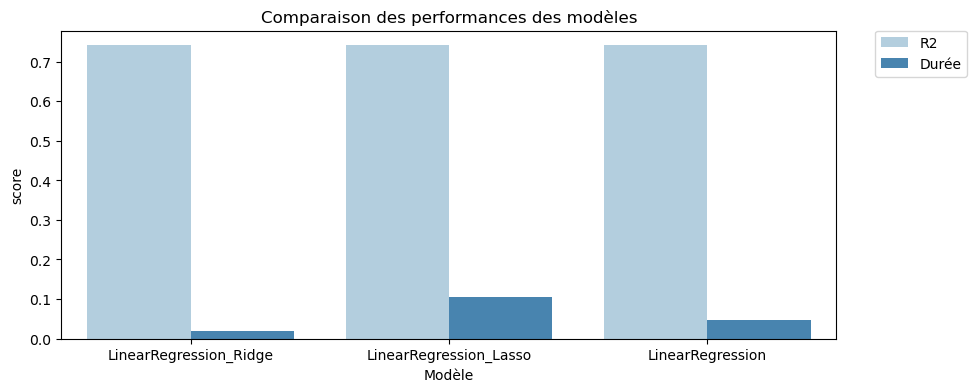

In [70]:


comparaison_score_melt1 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(10,4))
sns.barplot(x=comparaison_score_melt1['Modèle'],
            y=comparaison_score_melt1['score'], hue=comparaison_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


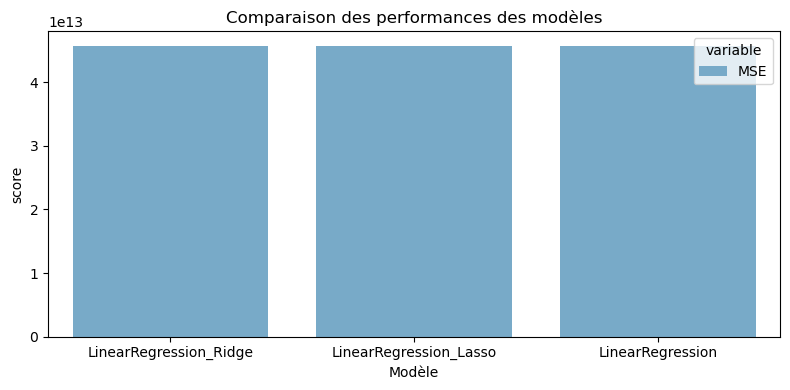

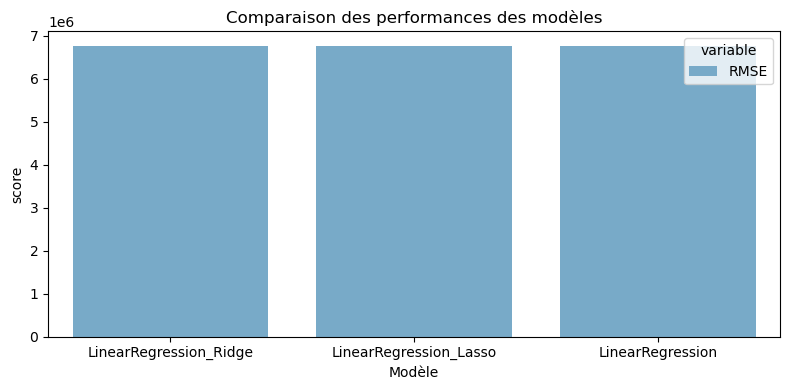

In [71]:

# Comparaison des 4 algorithmes les plus performants

comparaison_score_melt2 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_score_melt3 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(8,4))
sns.barplot(x=comparaison_score_melt2['Modèle'],
            y=comparaison_score_melt2['score'], hue=comparaison_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=comparaison_score_melt3['Modèle'],
            y=comparaison_score_melt3['score'], hue=comparaison_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()



Parmi les algorithmes testés, ceux qui offrent les meilleurs résultats en termes de R2 et MSE sont :
 * **Régression Linéaire Ridge**
 * **Régression Linéaire Lasso**
 * **Régression Linéaire non régularisée**


<a id='opti_algo'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Optimisation des algorithmes** </span></span>


<a id='id_hyperparamètres'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Idéntification hyperparamètres </span>

In [72]:

# Création d'un dataframe pour enregistrer les résultats de l'optimissation des algorithmes 
df_resultats_opti = pd.DataFrame(dtype='object')


<a id='LR_Ridge_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Linear Regression Ridge**</span></span>

In [73]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'LinearRegression_Ridge']


Modèle          Scaler    Durée       R2        MAE  \
0  LinearRegression_Ridge    MinMaxScaler  0.00580  0.71011  3370592.0   
0  LinearRegression_Ridge    RobustScaler  0.00892  0.74138  3225003.0   
0  LinearRegression_Ridge  StandardScaler  0.02034  0.74144  3224572.0   

            MSE       RMSE  CV Train R2  CV Test R2  CV Train MSE  \
0  5.121902e+13  7156746.3     0.734220    0.652783  4.388992e+13   
0  4.569486e+13  6759797.1     0.769018    0.466612  3.814344e+13   
0  4.568366e+13  6758968.5     0.769034    0.469837  3.814092e+13   

    CV Test MSE  
0  5.671761e+13  
0  7.896728e+13  
0  7.856211e+13


Les meilleurs résultats de l'algorithme de régression linéaire Ridge sont atteints après la mise à l'échelle avec **Standard Scaler**.


In [74]:

df_resultats_algo, y_pred = process_regression(model_Ridge, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 3224572.39
 R2: 0.7414 


In [75]:

# Paramètres de base dans le 1er entrînement de l'algorithme "Linear Regression Ridge"
#-------------------------------------------------------------------------------------
print("Les paramètres pour l'algorithme 'linear regression Ridge':")
pprint(model_Ridge.get_params())


Les paramètres pour l'algorithme 'linear regression Ridge':
{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 84,
 'solver': 'auto',
 'tol': 0.0001}


In [76]:

# Séléction des valeurs des hyperparamètres à tester
#---------------------------------------------------
LRRidge_params = {'alpha' : [.0001, 0.001,0.01, 0.01,1],
                  'tol' : [0.001,0.0001,0.00001], 
                  'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
                  'max_iter' : [None, 1000,15000]}


In [77]:

#Cross validation des combinaisons des valeurs des differents paramètres

LR_ridge_grid = model_selection.GridSearchCV(model_Ridge, LRRidge_params,
                                        cv =stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

LR_ridge_grid.fit(X_train_stdS, y_train)


Fitting 5 folds for each of 315 candidates, totalling 1575 fits


GridSearchCV(error_score='raise', estimator=Ridge(random_state=84),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.01, 1],
                         'max_iter': [None, 1000, 15000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, verbose=1)

In [78]:

# Meilleurs paramètres identifiés pendant la validation croissée
#---------------------------------------------------------------
best_LR_Ridge_params = LR_ridge_grid.best_params_
pprint("Les paramètres retenus sont : ")
best_LR_Ridge_params


'Les paramètres retenus sont : '


{'alpha': 1, 'max_iter': None, 'solver': 'saga', 'tol': 0.0001}

In [79]:

# Création d'un dataframe pour enregistrer les résultats 
LR_Ridge_params_results = pd.DataFrame(dtype='object')

resultize(LR_ridge_grid,LR_Ridge_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
271       0.503617      0.020963         0.001811        0.000014           1   
292       0.505000      0.019226         0.001804        0.000018           1   

    param_max_iter param_solver param_tol  \
271           None         saga    0.0001   
292           1000         saga    0.0001   

                                                params  mean_test_score  \
271  {'alpha': 1, 'max_iter': None, 'solver': 'saga...         0.469907   
292  {'alpha': 1, 'max_iter': 1000, 'solver': 'saga...         0.469907   

     std_test_score  rank_test_score  mean_train_score  std_train_score  
271        0.317018                1          0.769012         0.005828  
292        0.317018                1          0.769012         0.005828

In [80]:

model_LR_Ridge_opti = Ridge(**best_LR_Ridge_params, random_state=randomN)

df_resultats_opti, y_pred = process_regression(model_Ridge, 
                                               X_train_stdS, X_test_stdS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_opti,'LinearRegression_Ridge_opti', 'RobustScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 3224572.39
 R2: 0.7414 


In [81]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='LinearRegression_Ridge') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='LinearRegression_Ridge_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='LinearRegression_Ridge') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='LinearRegression_Ridge_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 0.01%. 
Amélioration de la durée : -43.39%. 


---

**Bilan**<br>

L'optimisation des paramètres de l'algorithme de régression linéaire Ridge a permis une amélioration de 0,1% de l'une des métriques utilisées dans les classements. Cependant, le même processus a induit une détérioration de 46% du temps d'exécution.

---

<a id='LR_lasso_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres linear regression LASSO**</span></span>

In [82]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'LinearRegression_Lasso']


Modèle          Scaler    Durée       R2        MAE  \
0  LinearRegression_Lasso    MinMaxScaler  0.10460  0.74116  3225204.0   
0  LinearRegression_Lasso    RobustScaler  0.16606  0.74116  3225225.0   
0  LinearRegression_Lasso  StandardScaler  0.18403  0.74116  3225226.0   

            MSE       RMSE  CV Train R2  CV Test R2  CV Train MSE  \
0  4.573293e+13  6762612.7     0.769056    0.466528  3.813733e+13   
0  4.573415e+13  6762702.8     0.769056    0.466534  3.813733e+13   
0  4.573412e+13  6762700.4     0.769056    0.466534  3.813733e+13   

    CV Test MSE  
0  7.897504e+13  
0  7.897484e+13  
0  7.897482e+13


Les meilleurs résultats de l'algorithme de régression linéaire Lasso sont atteints après la mise à l'échelle avec **MinMax Scaler**. 
Le coefficient R2 obtenu est le même indépendamment de la méthode de misse à l'échelle, mais les erreurs sont légèrement meilleures avec les données mises à l'échelle avec MinMax Scaler.


In [83]:

df_resultats_algo, y_pred = process_regression(model_LASSO, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression_Lasso','MinMaxScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 3225204.46
 R2: 0.7412 


In [84]:

# Paramètres de base dans le 1er entrînement de l'algorithme "Linear Regression Lasso"
#-------------------------------------------------------------------------------------
print("Les paramètres pour l'algorithme 'linear regression Lasso':")
pprint(model_LASSO.get_params())


Les paramètres pour l'algorithme 'linear regression Lasso':
{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 84,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


In [85]:

# Séléction des valeurs des hyperparamètres à tester
LR_Lasso_params = {'alpha' : [.0001, 0.001,0.01, 0.01,1],
                   'tol' : [0.001,0.0001,0.00001],
                   'max_iter' : [1000,10000, 20000],
                   'selection' : ['cyclic','random']}


In [86]:

#Cross validation des combinaisons des valeurs des differents paramètres

LR_lasso_grid = model_selection.GridSearchCV(model_LASSO, LR_Lasso_params,
                                        cv =stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

#Cross validation des combinaisons des valeurs des differents paramètres
LR_lasso_grid.fit(X_train_MM, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(error_score='raise', estimator=Lasso(random_state=84),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.01, 1],
                         'max_iter': [1000, 10000, 20000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, verbose=1)

In [87]:

#Best parameters
best_LR_Lasso_params = LR_lasso_grid.best_params_
pprint(best_LR_Lasso_params)


{'alpha': 0.0001, 'max_iter': 1000, 'selection': 'cyclic', 'tol': 0.001}


In [88]:

# Création d'un dataframe pour enregistrer les résultats 
LR_Lasso_params_results = pd.DataFrame(dtype='object')

resultize(LR_lasso_grid,LR_Lasso_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.142365      0.026168         0.021898        0.009501      0.0001   
1       0.136986      0.020904         0.018272        0.012336      0.0001   

  param_max_iter param_selection param_tol  \
0           1000          cyclic     0.001   
1           1000          cyclic    0.0001   

                                              params  mean_test_score  \
0  {'alpha': 0.0001, 'max_iter': 1000, 'selection...         0.466534   
1  {'alpha': 0.0001, 'max_iter': 1000, 'selection...         0.466534   

   std_test_score  rank_test_score  mean_train_score  std_train_score  
0        0.322758                1          0.769056         0.005833  
1        0.322758                1          0.769056         0.005833

In [89]:

model_LR_Lasso_opti = Lasso(**best_LR_Lasso_params, random_state=randomN)

df_resultats_opti, y_pred = process_regression(model_LASSO, 
                                               X_train_MM, X_test_MM,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_opti,'LinearRegression_Lasso_opti', 'MinMaxScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 3225204.46
 R2: 0.7412 


In [90]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='LinearRegression_Lasso') & (df_resultats_algo['Scaler'] =='MinMaxScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='LinearRegression_Lasso_opti') & (df_resultats_opti['Scaler'] =='MinMaxScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='LinearRegression_Lasso') & (df_resultats_algo['Scaler'] =='MinMaxScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='LinearRegression_Lasso_opti') & (df_resultats_opti['Scaler'] =='MinMaxScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 0.0%. 
Amélioration de la durée : 47.75%. 


---

**Bilan**<br>

L'optimisation des paramètres de l'algorithme de régression linéaire Lasso n'a pas modifié les métriques utilisées dans les classements. Cependant, le même processus a induit une détérioration de 20% du temps d'exécution.

---

<a id='LR_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Linear Regression**</span></span>

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [91]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'LinearRegression']


Modèle          Scaler    Durée       R2        MAE  \
0  LinearRegression    MinMaxScaler  0.03771  0.74115  3225336.0   
0  LinearRegression    RobustScaler  0.04674  0.74116  3225228.0   
0  LinearRegression  StandardScaler  0.02161  0.74138  3225734.0   

            MSE       RMSE  CV Train R2    CV Test R2  CV Train MSE  \
0  4.573496e+13  6762762.4     0.766480 -1.012076e+19  3.849694e+13   
0  4.573421e+13  6762707.1     0.769056  4.663938e-01  3.813733e+13   
0  4.569414e+13  6759743.8     0.769042 -1.604170e+20  3.813926e+13   

    CV Test MSE  
0  1.258792e+33  
0  7.899172e+13  
0  2.011086e+34


Les meilleurs résultats de l'algorithme de régression linéaire non régularisée sont atteints après la mise à l'échelle avec **Robust Scaler**. 


In [92]:

df_resultats_algo, y_pred = process_regression(model_LR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_algo,'LinearRegression_Lasso','Robust Scaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 3225228.03
 R2: 0.7412 


In [93]:

# Paramètres de base dans le 1er entrînement de l'algorithme "Linear Regression non régularisé"
#-------------------------------------------------------------------------------------
print("Les paramètres pour l'algorithme 'linear regression':")
pprint(model_LR.get_params())


Les paramètres pour l'algorithme 'linear regression':
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [94]:

# Séléction des valeurs des hyperparamètres à tester
LR_params = {'n_jobs' : [None, 1, -1]}


In [95]:

#Cross validation des combinaisons des valeurs des differents paramètres

LR_grid = model_selection.GridSearchCV(model_LR, LR_params,
                                        cv =stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

LR_grid.fit(X_train_RS, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(error_score='raise', estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 1, -1]}, return_train_score=True,
             verbose=1)

In [96]:

# Best parameters
best_LR_params = LR_grid.best_params_
pprint("Les paramètres retenus sont : " )
best_LR_params


'Les paramètres retenus sont : '


{'n_jobs': None}

In [97]:

# Création d'un dataframe pour enregistrer les résultats 
LR_params_results = pd.DataFrame(dtype='object')

resultize(LR_grid,LR_params_results).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_jobs  \
0       0.010892       0.00293          0.00494        0.001545         None   
1       0.010082       0.00187          0.00349        0.000311            1   

             params  mean_test_score  std_test_score  rank_test_score  \
0  {'n_jobs': None}         0.466394        0.323036                1   
1     {'n_jobs': 1}         0.466394        0.323036                1   

   mean_train_score  std_train_score  
0          0.769056         0.005833  
1          0.769056         0.005833

In [98]:

model_LR_opti = LinearRegression(**best_LR_params)

df_resultats_opti, y_pred = process_regression(model_LR_opti, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']),
                                               df_resultats_opti,'LinearRegression_opti', 'RobustScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 3225228.03
 R2: 0.7412 


In [99]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='LinearRegression') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='LinearRegression_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='LinearRegression') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='LinearRegression_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 0.0%. 
Amélioration de la durée : -78.24%. 


---

**Bilan**<br>

L'optimisation des paramètres de l'algorithme de régression linéaire Lasso n'a pas modifié les métriques utilisées dans les classements. Cependant, le même processus a induit une détérioration de 1% du temps d'exécution.

---

<a id='selec_algo'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Sélection du meilleur algorithme pour la estimation de la consommation totale d'énergie </span>
    

**Tableau de résultats des scores par modèle**

In [100]:

bilan_opti_algo = df_resultats_opti.append(df_baseline, ignore_index=True)

bilan_opti_algo = bilan_opti_algo.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_opti_algo.style.hide(axis="index")

bilan_opti_algo



Modèle          Scaler    Durée       R2        MAE  \
0  LinearRegression_Ridge_opti    RobustScaler  0.00505  0.74144  3224572.0   
1  LinearRegression_Lasso_opti    MinMaxScaler  0.15455  0.74116  3225204.0   
2        LinearRegression_opti    RobustScaler  0.01017  0.74116  3225228.0   
3           DummyRegressorMean  StandardScaler  0.00036 -0.00029  7084527.0   

            MSE        RMSE  CV Train R2  CV Test R2  CV Train MSE  \
0  4.568366e+13   6758968.5     0.769034    0.469837  3.814092e+13   
1  4.573293e+13   6762612.7     0.769056    0.466528  3.813733e+13   
2  4.573421e+13   6762707.1     0.769056    0.466394  3.813733e+13   
3  1.767373e+14  13294257.5     0.000000   -0.002550  1.652326e+14   

    CV Test MSE  
0  7.856211e+13  
1  7.897504e+13  
2  7.899172e+13  
3  1.653303e+14

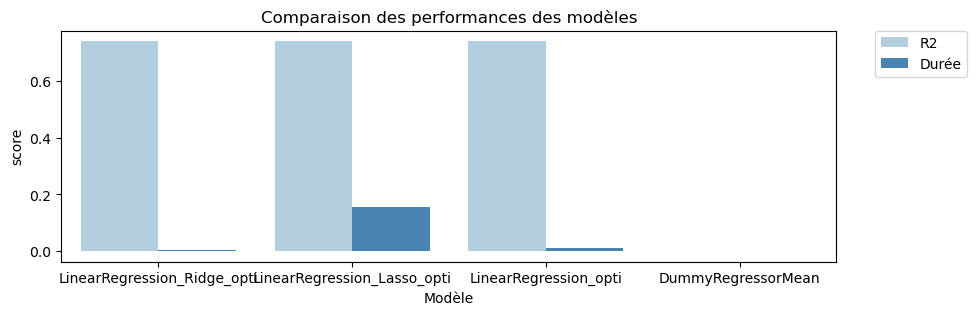

In [101]:

# Résultats des algorithmes optimisés

comparaison_opti_score_melt1 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(10,3))
sns.barplot(x=comparaison_opti_score_melt1['Modèle'],
            y=comparaison_opti_score_melt1['score'], hue=comparaison_opti_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


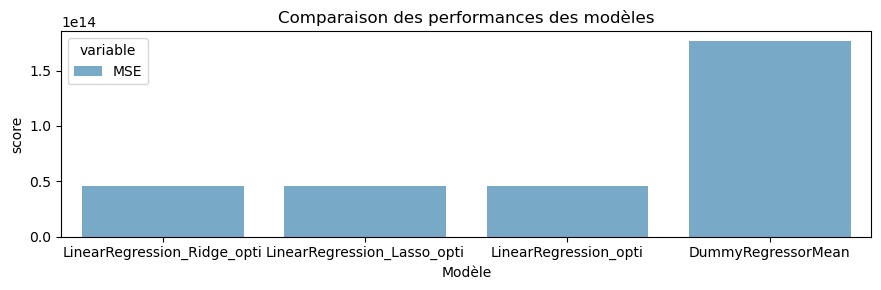

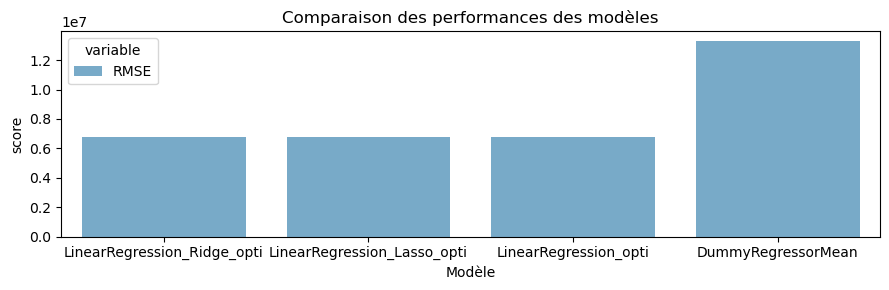

In [102]:

# Résultats des algorithmes optimisés

comparaison_opti_score_melt2 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_opti_score_melt3 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(9,3))
sns.barplot(x=comparaison_opti_score_melt2['Modèle'],
            y=comparaison_opti_score_melt2['score'], hue=comparaison_opti_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(9,3))
sns.barplot(x=comparaison_opti_score_melt3['Modèle'],
            y=comparaison_opti_score_melt3['score'], hue=comparaison_opti_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)

plt.tight_layout()  
plt.show()


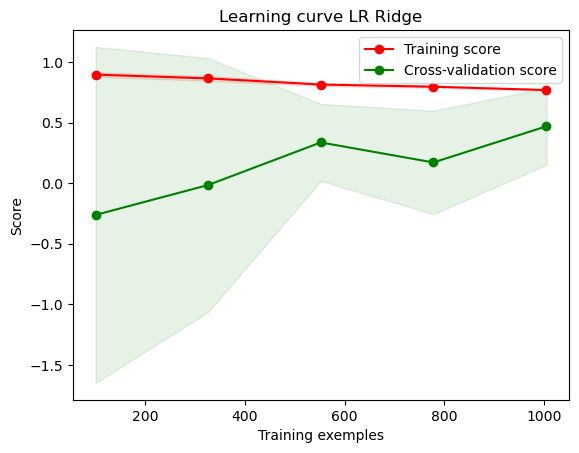

In [103]:

# Linear regression Ridge Learning curve
plot_learning_curve(model_LR_Ridge_opti, 'Learning curve LR Ridge', X_train_stdS, y_train, cv = stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']))




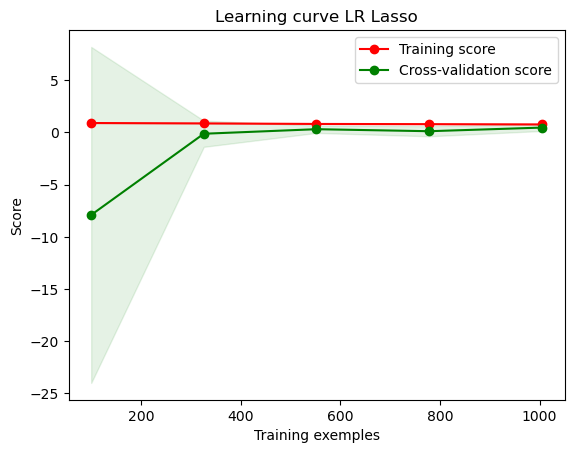

In [104]:

# Linear regression Lasso Learning curve
plot_learning_curve(model_LR_Lasso_opti, 'Learning curve LR Lasso', X_train_MM, y_train, cv = stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']))




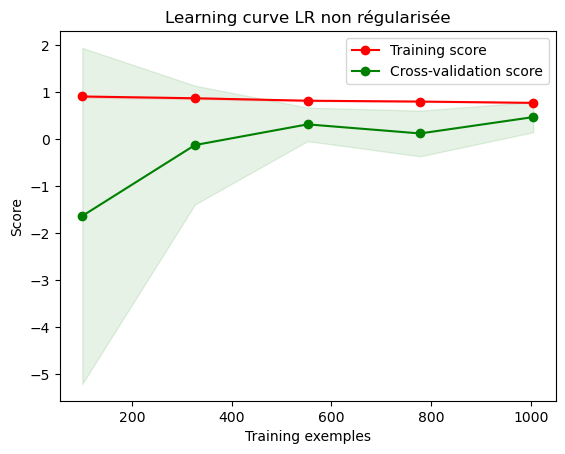

In [105]:

# Linear regression non régularisée Learning curve
plot_learning_curve(model_LR_opti, 'Learning curve LR non régularisée', X_train_RS, y_train, cv = stratified_cv(X_train, strat_train_set['SiteEnergyUseWN_cat']))






**Bilan**

---
L'algorithme présentant les meilleurs scores ainsi que la durée la plus courte est la *Régression Lineaire Ridge* sur le jeu de données ayant suivi une mise à l'échelle avec *Robust Scaler*.

---


<a id='pred_final'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Prédictions du modèle final** </span></span>



In [106]:

#---------------------------------------------------------------------------------------
# Chargement des jeux de données  utiles pour la comprehension des erreurs de prédiction
#---------------------------------------------------------------------------------------
source_BEB_2016 = pd.read_csv('/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_source/2016_Building_Energy_Benchmarking.csv', low_memory=False,encoding='utf-8')
index_BEB_2016 = pd.read_csv('index_BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')


In [107]:

model_LR_Ridge_opti.fit(X_train_stdS, y_train)

# Predictions avec le train set
y_train_pred = model_LR_Ridge_opti.predict(X_train_stdS)

# Predictions avec le test set
y_test_pred = model_LR_Ridge_opti.predict(X_test_stdS)


<a id='features_importance'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables pour la estimation de la consomation d'énergie </span>
    

In [108]:

# Création du 'Explainer' en considerant la rélation entre les variables
LR_ridge_explainer = shap.explainers.Linear(model_LR_Ridge_opti, X_train_stdS, feature_perturbation="correlation_dependent")


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [109]:

# Préparation des paramètres pour les représentations graphiques

shap_values_exp = LR_ridge_explainer(X_test_stdS)
featureNames = model_Conso_BEB_2016.drop(columns=['SiteEnergyUseWN(kBtu)','SiteEnergyUseWN_cat'], axis=1).columns.tolist()
maxDisp = len(featureNames)


In [110]:

# Importance des variables global
valeurs= np.abs(shap_values_exp.values).mean(0)
global_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
global_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
global_feature_importance = global_feature_importance.reset_index(drop=True)


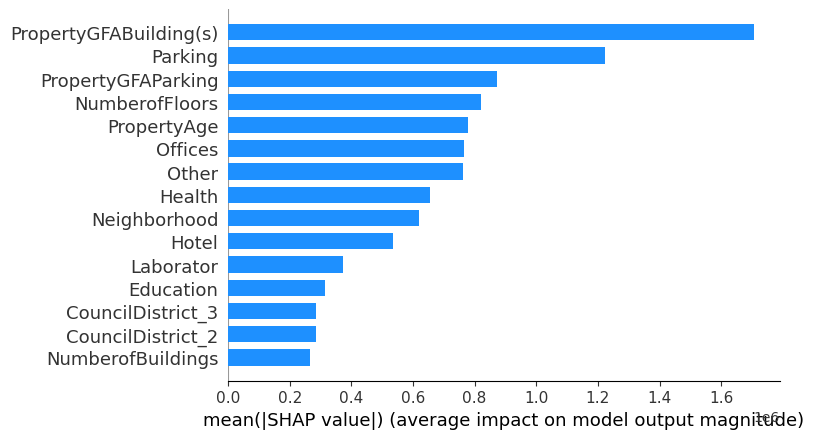

In [111]:

shap.summary_plot(shap_values_exp, max_display=15, plot_type="bar", color="dodgerblue", plot_size = 0.2)


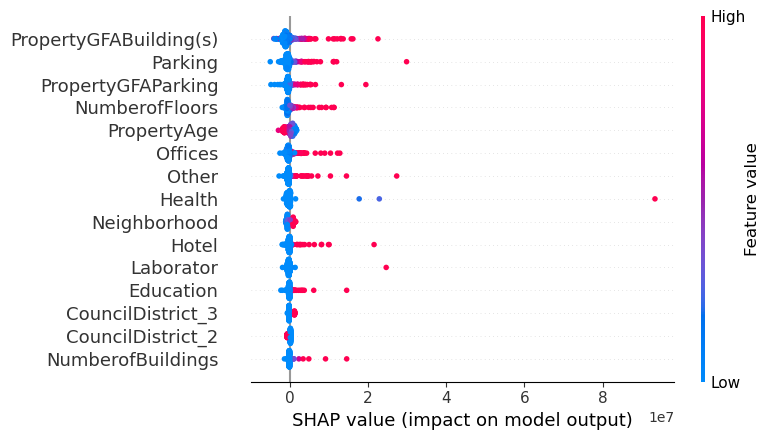

In [112]:

shap.summary_plot(shap_values_exp, max_display=15, plot_size = 0.2)


In [113]:

shap.plots.force(LR_ridge_explainer.expected_value, shap_values_exp.values, feature_names=featureNames, out_names="Consomation d'énergie")


<a id='pred_errors'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Erreurs de prédiction </span>



<span style='color:#67d1e9'>**Erreurs sur le train set**</span>


In [114]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_train = pd.DataFrame({'y_train_pred': y_train_pred, 'y_train': y_train})
df_error_train['erreur_abs'] = abs(y_train_pred - y_train)


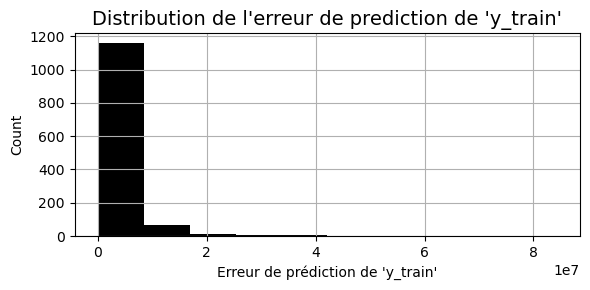

In [115]:

# Répresentation graphique de l'erreur absolut de predction du set de entraînement
df_error_train['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_train'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_train'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()



<span style='color:#67d1e9'>**Erreurs sur le test set**</span>


In [116]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_test = pd.DataFrame({'y_test_pred': y_test_pred, 'y_test': y_test})
df_error_test['erreur_abs'] = abs(y_test_pred - y_test)


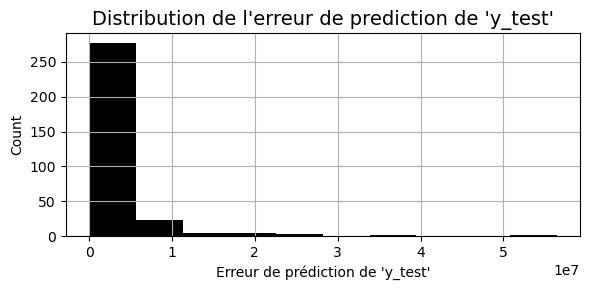

In [117]:

# Répresentation graphique de l'erreur absolut de predction du set de test
df_error_test['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_test'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_test'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()


In [118]:
df_error_test['erreur_abs'].describe()

count    3.150000e+02
mean     3.224902e+06
std      5.948710e+06
min      2.920235e+03
25%      7.620319e+05
50%      1.605184e+06
75%      3.102996e+06
max      5.642406e+07
Name: erreur_abs, dtype: float64

<a id='min_max_error'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur maximale et minimale sur le jeu de test**</span></span>

In [119]:
# Erreur maximale
df_error_max = df_error_test[df_error_test['erreur_abs'] == df_error_test['erreur_abs'].max()]
df_error_max


y_test_pred      y_test    erreur_abs
1232  4.035140e+07  96775464.0  5.642406e+07

In [120]:

# Obtention des les informations concernant la propriété associée à l'erreur
print("La propriétée avec l'erreur de prédiction maximale est : \n")

prop_max_error = index_BEB_2016.iloc[df_error_max.index.to_list(), :]
OSEBuildingID_prop_max_error = prop_max_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_max_error[0]]


La propriétée avec l'erreur de prédiction maximale est : 



OSEBuildingID  DataYear BuildingType PrimaryPropertyType  \
2325          25251      2016       Campus          University   

                 PropertyName          Address     City State  ZipCode  \
2325  5th Avenue Master Meter  3307 3rd Ave. W  Seattle    WA  98119.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
2325                    8900000555                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
2325  MAGNOLIA / QUEEN ANNE  47.65019 -122.36173       1945   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2325               14.0               2            537000                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
2325                  537000        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2325                   533826.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2325                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2325                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
2325              NaN        169.699997          181.300003   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
2325          266.799988            278.899994           90609640.0   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
2325             96775464.0             0.0         6629278.0   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
2325         22619097.0          679905.375        67990538.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
2325       NaN        Compliant     NaN            3768.66   

      GHGEmissionsIntensity  
2325                   7.02

In [121]:
# Erreur minimale
df_error_min = df_error_test[df_error_test['erreur_abs'] == df_error_test['erreur_abs'].min()]
df_error_min


y_test_pred       y_test   erreur_abs
907  1.828427e+06  1831347.125  2920.234579

In [122]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("La propriétée avec l'erreur de prédiction minimale est : \n")

prop_min_error = index_BEB_2016.iloc[df_error_min.index.to_list(), :]
OSEBuildingID_prop_min_error = prop_min_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_min_error[0]]


La propriétée avec l'erreur de prédiction minimale est : 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
1496          22078      2016  NonResidential    Worship Facility   

                      PropertyName        Address     City State  ZipCode  \
1496  Immaculate Conception Church  820 18th Ave.  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
1496                    2254502165                    3      CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
1496   47.6101 -122.30838       1901                1.0               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1496             26560                   0                   26560   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
1496          Worship Facility       Worship Facility   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1496                    26560.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1496                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1496                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1496              1.0         65.900002                69.0   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
1496          117.199997            121.099998          1751483.875   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
1496            1831347.125             0.0       178775.7969   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
1496           609983.0         11415.00977         1141501.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
1496       NaN        Compliant     NaN              64.88   

      GHGEmissionsIntensity  
1496                   2.44

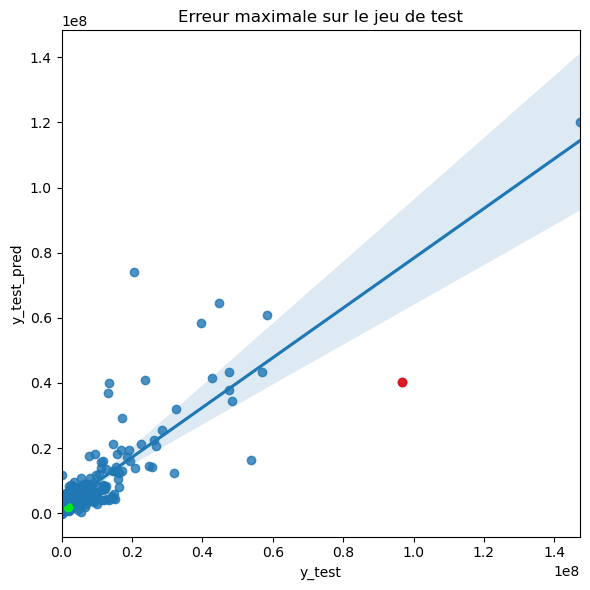

In [123]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_error_max, x=df_error_max['y_test'], y=df_error_max['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_error_min, x=df_error_min['y_test'], y=df_error_min['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur maximale sur le jeu de test')
    
plt.tight_layout() 
plt.show()


In [124]:
# Position de l'éntrée associée au erreur maximal dans le test set
X_test_item = [i for i,index in enumerate(X_test_stdS.index.tolist()) if index == df_error_max.index]

# Importance des variables erreur max
valeurs= np.abs(shap_values_exp[X_test_item].values).mean(0)
error_max_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_max_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_max_feature_importance = error_max_feature_importance.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur maximale
shap.plots.force(LR_ridge_explainer.expected_value, shap_values_exp[X_test_item].values, feature_names=featureNames, out_names="Consomation d'énergie")


In [125]:
# Position de l'éntrée associée au erreur minimale dans le test set
X_test_item = [i for i,index in enumerate(X_test_stdS.index.tolist()) if index == df_error_min.index]

# Importance des variables erreur min
valeurs= np.abs(shap_values_exp[X_test_item].values).mean(0)
error_min_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_min_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_min_feature_importance =error_min_feature_importance.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur minimale
shap.plots.force(LR_ridge_explainer.expected_value, shap_values_exp[X_test_item].values, feature_names=featureNames, out_names="Consomation d'énergie")


<a id='erreur_sup95'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreurs de prédiction de consomation d'énergie est supérieur à celui du 95% des prédictions restantes**</span></span>

In [126]:

#  erreur sur le jeu de test de plus de 95%
df_erreur_sup95 = df_error_test[df_error_test['erreur_abs']> df_error_test['erreur_abs'].quantile(0.95)]
df_erreur_sup95=df_erreur_sup95.sort_values(by=['erreur_abs'], ascending=[False])
df_erreur_sup95


y_test_pred       y_test    erreur_abs
1232  4.035140e+07   96775464.0  5.642406e+07
1494  7.391256e+07   20672948.0  5.323961e+07
318   1.641745e+07   53734196.0  3.731675e+07
129   1.200125e+08  147299056.0  2.728660e+07
1396  3.995023e+07   13473994.0  2.647623e+07
243   3.685797e+07   13329024.0  2.352895e+07
169   6.454428e+07   44683660.0  1.986062e+07
286   1.237861e+07   31915486.0  1.953688e+07
512   5.830879e+07   39518364.0  1.879042e+07
61    4.102980e+07   23736924.0  1.729287e+07
208   3.451290e+07   48479988.0  1.396709e+07
209   4.322027e+07   57051236.0  1.383097e+07
1422  2.923016e+07   17311366.0  1.191880e+07
1533  1.164735e+07          0.0  1.164735e+07
414   1.402436e+07   25567108.0  1.154275e+07
145   4.457352e+06   15230290.0  1.077294e+07

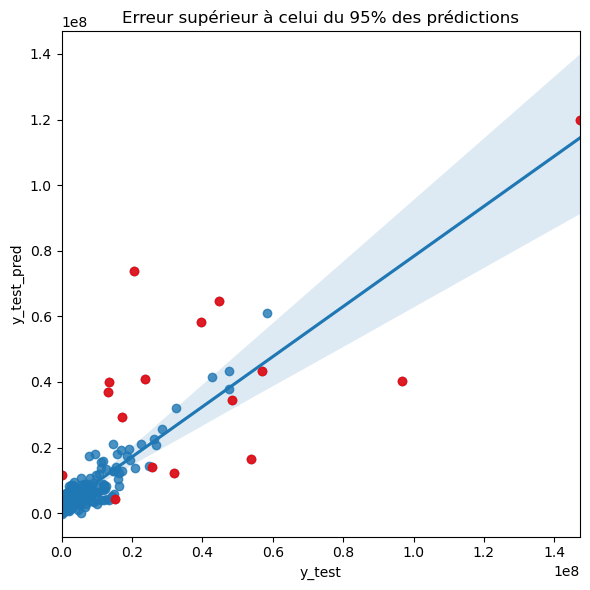

In [127]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup95, x=df_erreur_sup95['y_test'], y=df_erreur_sup95['y_test_pred'], color ='red', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur supérieur à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [128]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_sup95.shape[0]) + " propriétées dont l'erreur de prédiction de leur consomation d'énergie est supérieur à celui du 95% des prédictions restantes. Il s'agit de: \n")

prop_95_error = index_BEB_2016.iloc[df_erreur_sup95.index.to_list(), :]
OSEBuildingID_prop_95_error = prop_95_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_95_error)]


Il y a 16 propriétées dont l'erreur de prédiction de leur consomation d'énergie est supérieur à celui du 95% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
69              103      2016  Nonresidential COS               Other   
167             268      2016      NonResidential            Hospital   
197             317      2016  Nonresidential COS               Other   
221             345      2016      NonResidential        Large Office   
261             388      2016      NonResidential        Large Office   
262             389      2016      NonResidential               Hotel   
297             427      2016      NonResidential        Large Office   
341             480      2016      NonResidential  Mixed Use Property   
373             525      2016      NonResidential  Mixed Use Property   
472             634      2016      NonResidential        Large Office   
577             772      2016      NonResidential        Large Office   
2325          25251      2016              Campus          University   
2835          27145      2016      NonResidential        Large Office   
2963          27673      2016      NonResidential               Hotel   
3168          49705      2016  Nonresidential COS               Other   
3277          49972      2016      NonResidential          University   

                                     PropertyName                     Address  \
69                                      Key Arena              334 1st Ave. N   
167                           Swedish Cherry Hill                500 17th Ave   
197                              Seattle Aquarium            1421 Alaskan Way   
221                              999 Third Avenue  999 3rd Avenue, Suite 1550   
261                                 Rainier Tower                1301 5th Ave   
262                      Fairmont Olympic Seattle       411 University Street   
297               World Trade Center East-Seattle            2211 Elliott Ave   
341                           307 Westlake - SEDO        307 Westlake Ave. N.   
373                            Seattle Art Museum             1300 1st Avenue   
472                  505 FIRST AVE S BLDG (ID634)               505 1ST AVE S   
577                              800 Fifth Avenue                 800 5th Ave   
2325                      5th Avenue Master Meter             3307 3rd Ave. W   
2835               719 2nd Ave (Millennium Tower)                 719 2nd Ave   
2963                                    Hotel1000               1000 1st Ave.   
3168                                     Magnuson      7400 Sand Point Way NE   
3277  Computer Science and Electrical Engineering       3785 E Stevens Way NE   

         City State  ZipCode TaxParcelIdentificationNumber  \
69    Seattle    WA  98109.0                    1985200003   
167   Seattle    WA  98122.0                    7942600331   
197   Seattle    WA  98101.0                    7666202420   
221   Seattle    WA  98104.0                    0939000435   
261   Seattle    WA  98101.0                    0002400003   
262   Seattle    WA  98101.0                    0002400003   
297   Seattle    WA  98121.0                    1977200187   
341   Seattle    WA  98109.0                    1986200135   
373   Seattle    WA  98101.0                    1974700010   
472   Seattle    WA  98104.0                    7666206900   
577   Seattle    WA  98104.0                    0942000470   
2325  Seattle    WA  98119.0                    8900000555   
2835  Seattle    WA  98104.0                    5530510000   
2963  Seattle    WA  98104.0                    5017300000   
3168  Seattle    WA  98115.0                    0225049062   
3277  Seattle    WA  98195.0                    1625049001   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
69                      7  MAGNOLIA / QUEEN ANNE  47.62208 -122.35398   
167                     3                CENTRAL  47.60705 -122.30966   
197                     7               DOWNTOWN  47.60729 -122.34211   
221                     7              

In [129]:

# Position des propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

# Liste des indices concernées 
erreur_sup95_idx_list = df_erreur_sup95.index.tolist()
X_test_stdS_idx = X_test_stdS.index.tolist()


# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_sup95_idx_list]


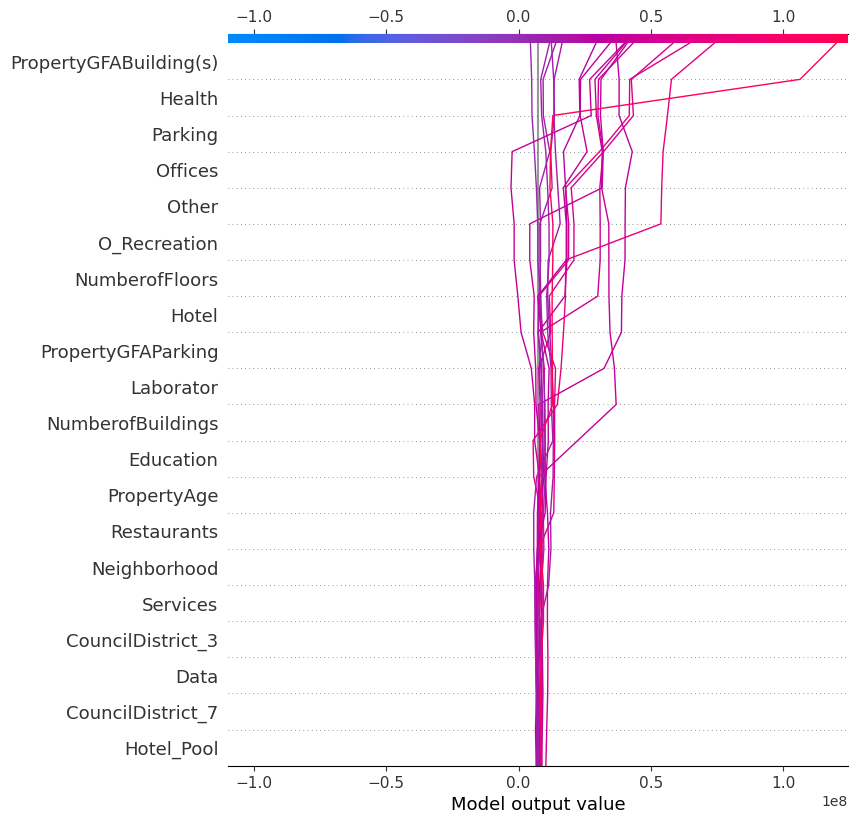

In [130]:

# Importance des variables error_sup95
valeurs= np.abs(shap_values_exp[X_test_items].values).mean(0)
error_sup95_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_sup95_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_sup95_feature_importance =error_sup95_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(LR_ridge_explainer.expected_value, LR_ridge_explainer.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_inf5'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreurs de prédiction de consomation d'énergie est inférieur à celui du 95% des prédictions restantes**</span></span>

In [131]:

#  erreur sur le jeu de test de moins de 5%
df_erreur_inf5 = df_error_test[df_error_test['erreur_abs'] < df_error_test['erreur_abs'].quantile(0.5)]


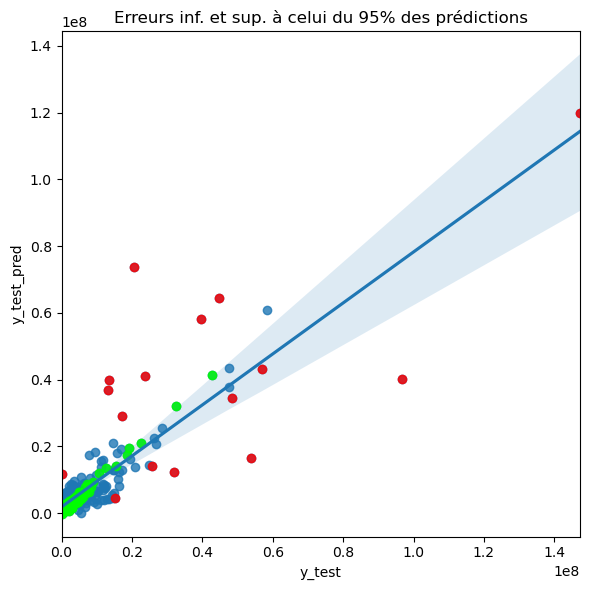

In [132]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup95, x=df_erreur_sup95['y_test'], y=df_erreur_sup95['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_erreur_inf5, x=df_erreur_inf5['y_test'], y=df_erreur_inf5['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreurs inf. et sup. à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [133]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_inf5.shape[0]) + " propriétées dont l'erreur de prédiction de leur consomation d'énergie est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf95_error = index_BEB_2016.iloc[df_erreur_inf5.index.to_list(), :]
OSEBuildingID_prop_inf95_error = prop_inf95_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf95_error)]


Il y a 157 propriétées dont l'erreur de prédiction de leur consomation d'énergie est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear        BuildingType  \
0                 1      2016      NonResidential   
13               18      2016      NonResidential   
64               95      2016      NonResidential   
76              113      2016      NonResidential   
134             220      2016      NonResidential   
...             ...       ...                 ...   
3175          49715      2016      NonResidential   
3182          49725      2016      NonResidential   
3280          49983      2016      NonResidential   
3362          50201      2016  Nonresidential COS   
3364          50207      2016  Nonresidential COS   

              PrimaryPropertyType  \
0                           Hotel   
13                          Hotel   
64                          Hotel   
76    Small- and Mid-Sized Office   
134                     Warehouse   
...                           ...   
3175               Residence Hall   
3182                        Other   
3280               Residence Hall   
3362                        Other   
3364                        Other   

                                           PropertyName  \
0                                  Mayflower park hotel   
13                           Crowne Plaza Hotel Seattle   
64                                       Sorrento Hotel   
76                                                KCTS9   
134                                                8109   
...                                                 ...   
3175                                           Elm Hall   
3182  VM Seattle Hospital & Medical Center - Jones P...   
3280                                        Poplar Hall   
3362                              Fire Station 35 (New)   
3364                           Ballard Community Center   

                    Address     City State  ZipCode  \
0             405 Olive way  Seattle    WA  98101.0   
13             1113 6th Ave  Seattle    WA  98101.0   
64          900 Madison St.  Seattle    WA  98104.0   
76            401 Mercer St  Seattle    WA  98109.0   
134        4786 First Ave S  Seattle    WA  98134.0   
...                     ...      ...   ...      ...   
3175    1218 NE Campus Pkwy  Seattle    WA  98195.0   
3182         1010 Spring St  Seattle    WA  98101.0   
3280  3715 W Stevens Way NE  Seattle    WA  98195.0   
3362       8729 15th Ave NW  Seattle    WA      NaN   
3364       6020 28th ave NW  Seattle    WA      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
13                      0942000235                    7   
64                      1979200270                    3   
76                      1988200705                    7   
134                     3573700006                    2   
...                            ...                  ...   
3175                    1142002135                    4   
3182                    8590901075                    3   
3280                    1625049001                    4   
3362                    3300700810                    6   
3364                    6658000065                    6   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
13                 DOWNTOWN  47.60809 -122.33212       1980   
64                     EAST  47.60898 -122.32693       1908   
76    MAGNOLIA / QUEEN ANNE  47.62391 -122.34837       1986   
134        GREATER DUWAMISH  47.55901 -122.33328       1937   
...                     ...       ...        ...        ...   
3175              NORTHEAST  47.65642 -122.31475       2012   
3182                   EAST  47.60989 -122.32659       2012   
3280              NORTHEAST  47.65176 -122.30756       2011   
3362                BALLARD  47.69330 -122.37717       2010   
3364                BALLARD  47.67295 -122.39228       1911   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0      

In [134]:

# Position des propriétés avec un erreur associé inférieur à celui du 90% des prédictions restantes

# Liste des indices concernées 
erreur_inf95_idx_list = df_erreur_inf5.index.tolist()


# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_inf95_idx_list]


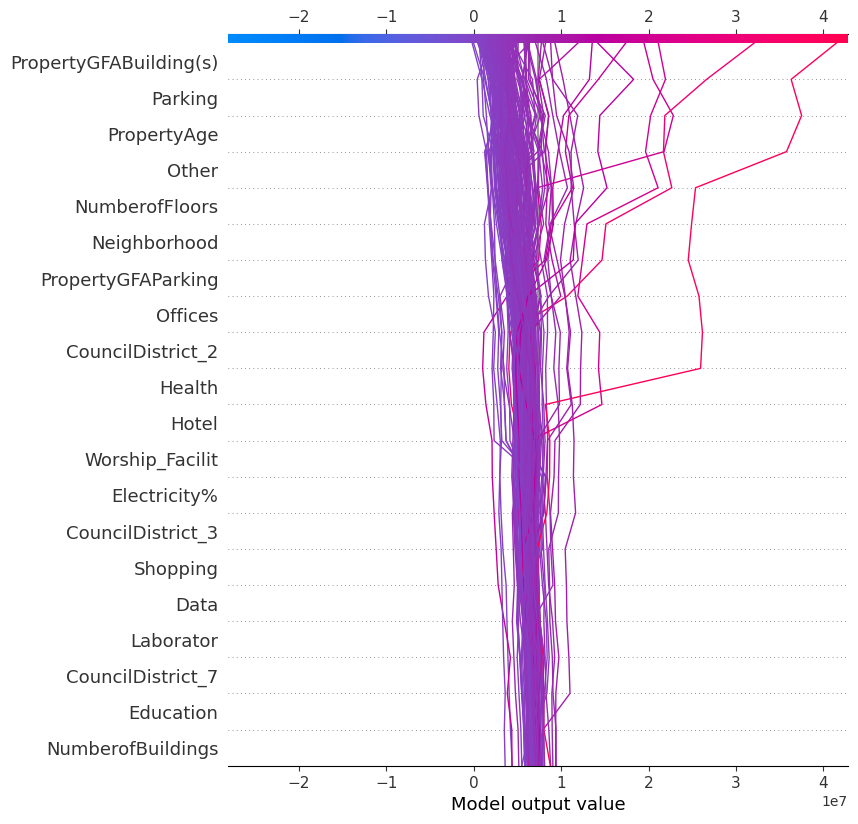

In [135]:

# Importance des variables erreur_inf95
valeurs= np.abs(shap_values_exp[X_test_items].values).mean(0)
erreur_inf95_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf95_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf95_feature_importance =erreur_inf95_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(LR_ridge_explainer.expected_value, LR_ridge_explainer.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_inf1'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreurs de prédiction de consomation d'énergie est inférieur à celui du 99% des prédictions restantes**</span></span>

In [136]:

#  erreur sur le jeu de test de moins de 1%
df_erreur_inf1 = df_error_test[df_error_test['erreur_abs'] < df_error_test['erreur_abs'].quantile(0.01)]
df_erreur_inf1


y_test_pred       y_test    erreur_abs
137   6.105022e+06  6057410.000  47612.089582
636   1.786990e+06  1781798.375   5191.223530
907   1.828427e+06  1831347.125   2920.234579
1361  7.561104e+05   730124.500  25985.855508

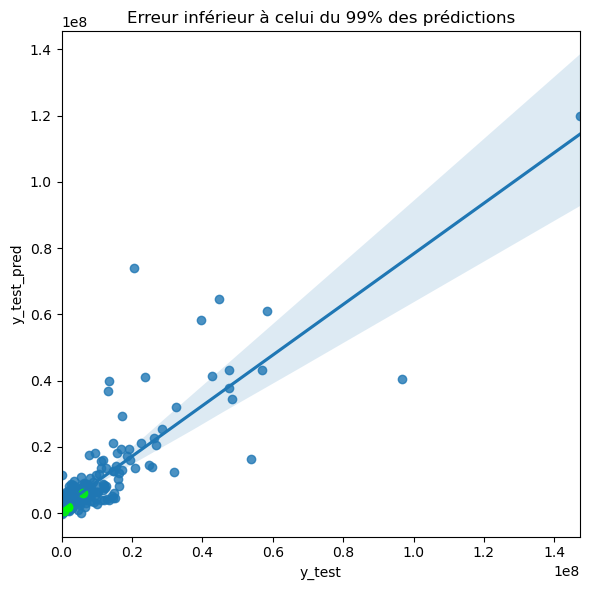

In [137]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_inf1, x=df_erreur_inf1['y_test'], y=df_erreur_inf1['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur inférieur à celui du 99% des prédictions')
    
plt.tight_layout() 
plt.show()


In [138]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("Il y a " + str(df_erreur_inf1.shape[0]) + " propriétées dont l'erreur de prédiction de leur consomation d'énergie est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf99_error = index_BEB_2016.iloc[df_erreur_inf1.index.to_list(), :]
OSEBuildingID_prop_inf99_error = prop_inf99_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf99_error)]


Il y a 4 propriétées dont l'erreur de prédiction de leur consomation d'énergie est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
185             293      2016  NonResidential                        Other   
859           20033      2016  NonResidential  Small- and Mid-Sized Office   
1496          22078      2016  NonResidential             Worship Facility   
2739          26773      2016  NonResidential             Worship Facility   

                       PropertyName               Address     City State  \
185                     ACT Theatre          700 Union St  Seattle    WA   
859                Lisa Li Building      4907 25th Ave NE  Seattle    WA   
1496   Immaculate Conception Church         820 18th Ave.  Seattle    WA   
2739  Lake City Presbyterian Church  3841 NE 123rd Street  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
185   98101.0                    2141290000                    7     DOWNTOWN   
859   98105.0                    0925049118                    4    NORTHEAST   
1496  98122.0                    2254502165                    3      CENTRAL   
2739  98125.0                    8820901145                    5        NORTH   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
185   47.61103 -122.33238       1914                1.0               7   
859   47.66461 -122.30142       1989                1.0               2   
1496  47.61010 -122.30838       1901                1.0               2   
2739  47.71705 -122.28577       1954                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
185             128766                   0                  128766   
859              20384                   0                   20384   
1496             26560                   0                   26560   
2739             21624                   0                   21624   

                              ListOfAllPropertyUseTypes  \
185   Office, Other, Other - Entertainment/Public As...   
859                                              Office   
1496                                   Worship Facility   
2739                                   Worship Facility   

                     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
185   Other - Entertainment/Public Assembly                   109754.0   
859                                  Office                    25021.0   
1496                       Worship Facility                    26560.0   
2739                       Worship Facility                    21624.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
185                         Other                          12876.0   
859                           NaN                              NaN   
1496                          NaN                              NaN   
2739                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
185                       Office                          6136.0   
859                          NaN                             NaN   
1496                         NaN                             NaN   
2739                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
185                       NaN              NaN         47.000000   
859                       NaN             16.0         71.599998   
1496                      NaN              1.0         65.900002   
2739                      NaN             90.0         30.799999   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
185            47.000000          142.399994            142.399994   
859            71.199997          222.199997            220.500000   
1496           69.000000          117.199997            121.099998   
2739           33.799999           62.599998             67.099998   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  

In [139]:

# Position des propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
# Liste des indices concernées 
erreur_inf99_idx_list = df_erreur_inf1.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_stdS_idx)) if X_test_stdS_idx[i] in erreur_inf99_idx_list]


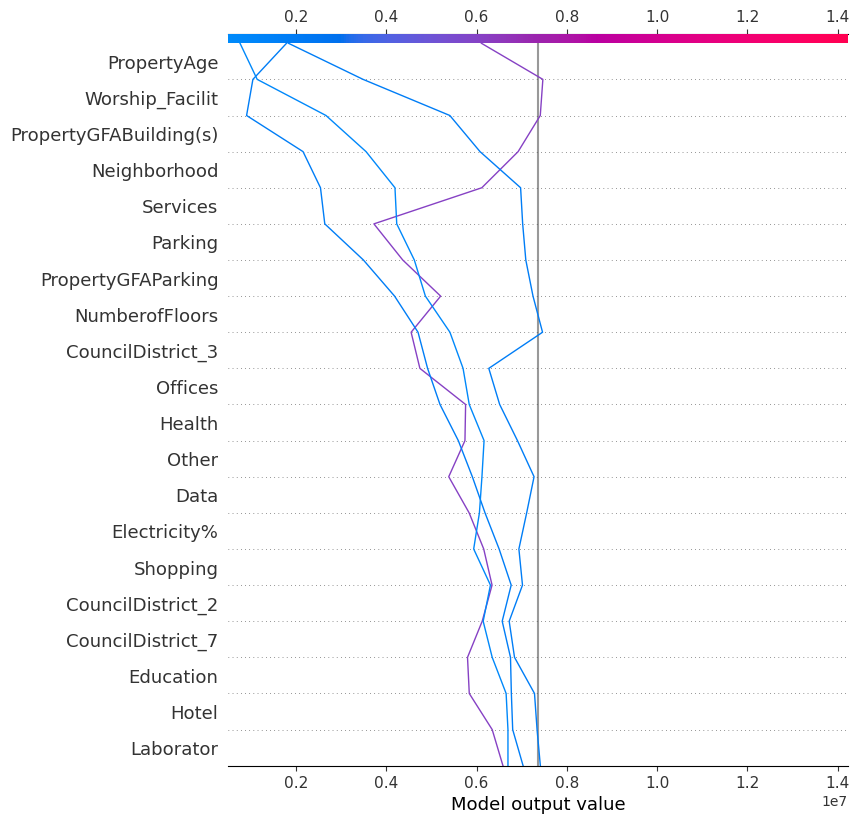

In [140]:

# Importance des variables erreur_inf99
valeurs= np.abs(shap_values_exp[X_test_items].values).mean(0)
erreur_inf99_feature_importance = pd.DataFrame(list(zip(X_train_stdS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf99_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf99_feature_importance =erreur_inf99_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(LR_ridge_explainer.expected_value, LR_ridge_explainer.shap_values(X_test_stdS.iloc[X_test_items]), feature_names=featureNames)


<a id='errors_feature_importance'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables associées aux erreurs plus/moins importants </span>


In [141]:

#----------------------------------------------------------
#Tableau synthèse differences en l'importance des variables
#----------------------------------------------------------

global_feature_imp_cls = global_feature_importance.reset_index().copy()
global_feature_imp_cls = global_feature_imp_cls.rename(columns={"index": "Global"}).drop(columns='feature_importance_valeurs').head(10)
global_feature_imp_cls["Global"] = global_feature_imp_cls["Global"]+1

error_max_feature_imp_cls = error_max_feature_importance.reset_index().copy()
error_max_feature_imp_cls = error_max_feature_imp_cls.rename(columns={"index": "ErreurMax"}).drop(columns='feature_importance_valeurs').head(10)
error_max_feature_imp_cls["ErreurMax"] = error_max_feature_imp_cls["ErreurMax"]+1

error_min_feature_imp_cls = error_min_feature_importance.reset_index().copy()
error_min_feature_imp_cls = error_min_feature_imp_cls.rename(columns={"index": "ErreurMin"}).drop(columns='feature_importance_valeurs').head(10)
error_min_feature_imp_cls["ErreurMin"] = error_min_feature_imp_cls["ErreurMin"]+1

error_sup95_feature_imp_cls = error_sup95_feature_importance.reset_index().copy()
error_sup95_feature_imp_cls = error_sup95_feature_imp_cls.rename(columns={"index": "Error_sup95"}).drop(columns='feature_importance_valeurs').head(10)
error_sup95_feature_imp_cls["Error_sup95"] = error_sup95_feature_imp_cls["Error_sup95"]+1

erreur_inf95_feature_imp_cls = erreur_inf95_feature_importance.reset_index().copy()
erreur_inf95_feature_imp_cls = erreur_inf95_feature_imp_cls.rename(columns={"index": "Error_inf90"}).drop(columns='feature_importance_valeurs').head(10)
erreur_inf95_feature_imp_cls["Error_inf90"] = erreur_inf95_feature_imp_cls["Error_inf90"]+1

df_features_importance_classement = reduce(lambda x,y: pd.merge(x,y, on='Variable', how='outer'),[error_max_feature_imp_cls, error_sup95_feature_imp_cls,\
                                                                                                  global_feature_imp_cls,\
                                                                                                  erreur_inf95_feature_imp_cls ,error_min_feature_imp_cls])

context = df_features_importance_classement.columns.tolist()
context.remove('Variable')


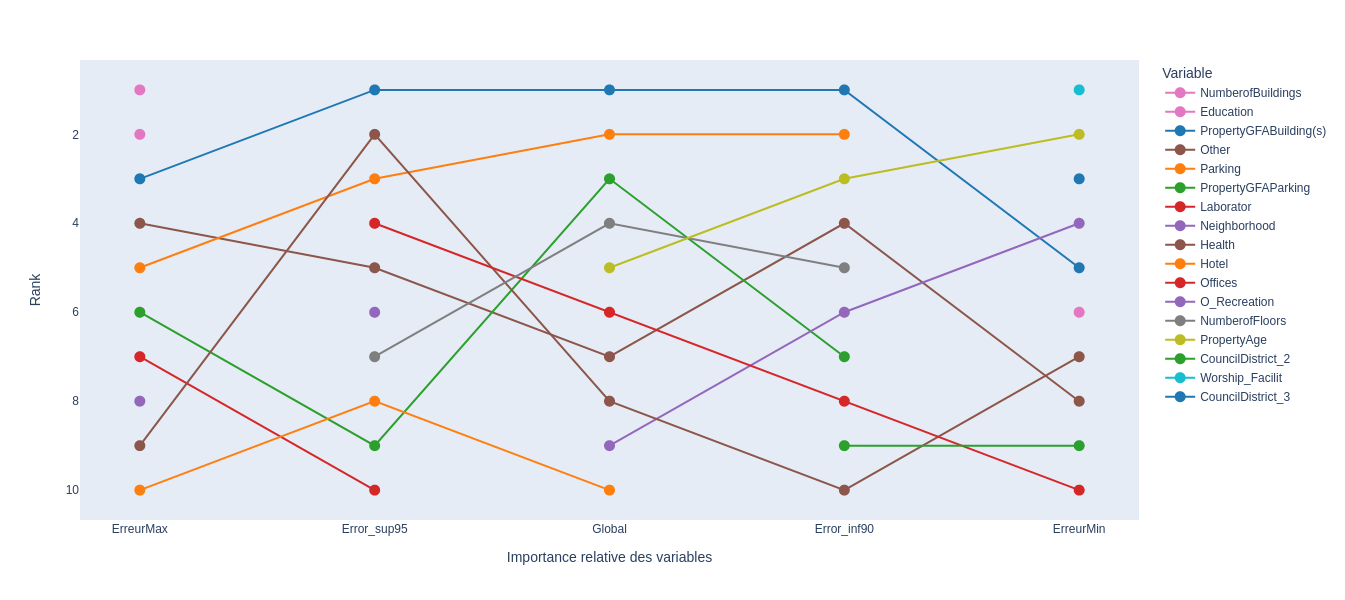

In [142]:

#----------------------------------------------
#Visualisation de l'évolution de l'attractivité
#----------------------------------------------

##
#Data
##
df_featImport_classement = pd.melt(frame = df_features_importance_classement, id_vars=["Variable"], value_vars = (context),\
                                   var_name="context", value_name="Importance")  
df_featImport_classement.head()


##
#Graph
##

#extract color palette, the palette can be changed
list_variables = list(set(df_featImport_classement['Variable']))
pal = list(sns.color_palette(n_colors=len(list_variables)).as_hex())
dict_color = dict(zip(list_variables, pal))

fig = px.line(df_featImport_classement, x = 'context', y = 'Importance',color = 'Variable', color_discrete_map= dict_color, markers=True, width=1000, height=600)
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(autorange='reversed', title='Rank',visible=True, showticklabels=True)
fig.update_xaxes(title='Importance relative des variables', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False) )

fig.show()


Certaines des variables qui contribuent le plus à la prédiction des données associées aux erreurs les plus élevées ne sont pas importantes dans la prédiction des données associées aux erreurs les plus élevées (par exemple, le nombre de bâtiments, l'éducation ou le laboratoire).